# Select initial parameters for GALAH DR4 analysis

In [7]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import pandas as pd
from astropy.table import Table, join
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
try:
    from zero_point import zpt
    zpt.load_tables()
except:
    raise ImportError('You need to install the package zero_point from here: https://gitlab.com/icc-ub/public/gaiadr3_zeropoint')
    
# Basic definitions
fancy_labels = dict()
fancy_labels['teff'] = r'$T_\mathrm{eff}~/~\mathrm{K}$'
fancy_labels['logg'] = r'$\log (g~/~\mathrm{cm\,s^{-2}})$'
fancy_labels['vmic'] = r'$v_\mathrm{mic}~/~\mathrm{km\,s^{-1}}$'
fancy_labels['vsini'] = r'$v \sin i~/~\mathrm{km\,s^{-1}}$'
fancy_labels['bp_rp'] = r'$BP-RP~/~\mathrm{mag}$'
fancy_labels['j_ks'] = r'$J-K_S~/~\mathrm{mag}$'
fancy_labels['m_g'] = r'$M_G~/~\mathrm{mag}$'
fancy_labels['m_ks'] = r'$M_{K_S}~/~\mathrm{mag}$'
fancy_labels['fe_h'] = r'$\mathrm{[Fe/H]}$'
fancy_labels['c_fe'] = r'$\mathrm{[C/Fe]}$'
fancy_labels['n_fe'] = r'$\mathrm{[N/Fe]}$'
fancy_labels['o_fe'] = r'$\mathrm{[O/Fe]}$'

## Possible Parameter Sources: GALAH DR4 Reduction, GALAH DR3, Gaia DR3, IRFM+

In [8]:
reduction_download_date = 220714
reduction_download_date = 220902
reduction_download_date = 230101
reduction_download_date = 230718 # This is a mix of dr60 and dr61 merged by hand

## What to do before here for 230718
Match dr6.0.fits and dr6.1.fits to get maximum of both:  
overlap from dr6.1  
add dr6.0 only and dr6.1 only  
then xmatch via RA and Dec with 2MASS in Topcat (not all sobject_id have the correct 2MASS yet).
keep only 2MASS -> tmass_id and sobject_id for crossmatch back to main dr6.0_or_dr6.1 file
do an all from left match with dr6.0_or_dr6.1 and 2MASS to create a tmass_id

In [15]:
# https://cloud.datacentral.org.au/apps/files/?dir=/GALAH/obs/reductions/Iraf_6.0
if reduction_download_date in [220714,220902,230101]:
    dr60 = Table.read('../observations/dr6.0_'+str(reduction_download_date)+'.fits')
elif reduction_download_date in [230718]:
    dr60 = Table.read('../observations/dr6.1_or_dr6.0_'+str(reduction_download_date)+'_tmass_id.fits')
else:
    raise ValueError('not prepared for this date')
dr60.sort('sobject_id')
unique_sobject_ids, unique_sobject_id_indices = np.unique(dr60['sobject_id'], return_index=True)
dr60 = dr60[unique_sobject_id_indices]

dr60['date'] = np.array([str(x)[:6] for x in dr60['sobject_id']])

table_length = len(dr60['date'])
dr60['survey_name'] = np.array(['                 ' for x in range(table_length)], dtype=str)
dr60['field_id'] = np.array([-1 for x in range(table_length)], dtype=int)

try:
    dr60['gaia_id'][dr60['gaia_id']=='None'] = -1
    dr60['source_id'] = np.array(dr60['gaia_id'],dtype=int)
    dr60.remove_column('gaia_id')
except:
    pass
if reduction_download_date not in [230718]:
    try:
        dr60['tmass_id'] = dr60['2mass']
        dr60.remove_column('2mass')
    except:
        pass
else:
    dr60.remove_column('2mass')
    
try:
    dr60['ebv'] = dr60['e_b-v']
    dr60.remove_column('e_b-v')
except:
    pass

dr60.write('../observations/dr6.0_'+str(reduction_download_date)+'.fits',overwrite=True)

In [34]:
others = [
'267m35.PM_p0.sds',
'268m16.PM_p0.sds',
'268m16.PM_p1.sds',
'268m21.PM_p1.sds',
'269m17.PM_p1.sds',
'269m42.PM_p1.sds',
'270m16.PM.sds',
'270m21.PM_p0.sds',
'270m21.PM_p0_131220.sds',
'270m28.PM_p0.sds',
'270m35.PM_p1.sds',
'270m41.PM_p1.sds',
'271m17.PM_p0.sds',
'272m16.PM_p0.sds',
'272m21.PM_p1.sds',
'272m35.PM_p0.sds',
'273m41.PM_p1.sds',
'ARC_F3_p0.sds',
'ARC_F4_p1.sds',
'ARC_F5_p0.sds',
'ARC_F6_p1.sds',
'N3201streamPM_F1_p0.sds',
'N3201streamPM_F2_p1.sds',
'UCAC4_20161212_p0.sds',
'twomass_172.2p7.3_p0.sds',
'twomass_213.75p7.0_p1.sds',
'gfo_middle_new_p1.sds',
'14B_29_Asplund_m0m75_p0.sds',
'14B_29_Asplund_m0m75_p1.sds',
'm0m5_LD_p1.sds',
'm0m5_LD_16jul_p0.sds',
'm0m10_LD_v2_p0.sds',
'm0m10_LD_v2_p1.sds',
'm0m10_LD_cut_1832_p1.sds',
'm0m10_LD_cut_1947_p0.sds',
'm0m10_LD_cut_2217_p0.sds',
'm0m10_LD_cut_2352_p1.sds',
'm0m10_LD_cut_0107_p0.sds',
'm0m10_LD_cut_0222_p1.sds',
'rp0_15712_3670432379_1201400_p0.sds',
'p3m3_K2C9_p0.sds',
'p3m3_K2C9_p1.sds',
'p3m3_K2C9_p1_new.sds',
'p3m3_K2C9_p0_new.sds',
'p3m3_K2C9_p0_new2.sds',
'axj0049_mod_p0.sds',
'keller_p1.sds',
'RV_Standards_plate1.sds',
'bf4.sds',
'V_1062_Sco_new_p0.sds',
'CrA_p1.sds','CrA_late_p0.sds',
'ra_0847-4713-12m_p1.sds'
]

corot = ['corot-1_p0.sds','LRa01_1P_1_FINAL_upd_p1.sds']

bulge = ['14B_29_Asplund_m0m75_p0.sds','14B_29_Asplund_m0m75_p1.sds']

gcs = dict()
gcs['NGC_104_47Tuc'] = ['47tuc-long_p0_131220.sds','47tuc-long_p1.sds','47tuc-short_center_p1.sds']
gcs['NGC_6121_M_4'] = [
    'M4_bright_03aug_p1.sds',
    'M4_bright_field.sds',
    'M4_dim_field_p0_3aug.sds',
    'M4_science_dim_p0.sds',
    'M4_science_bright_p1.sds',
    'M4_science_dim_p1.sds',
    'M4_dim_field.sds'
]
gcs['NGC_5139_oCen'] = ['OmegaCenBrightNew.sds','OmegaCenBrightNew_extra_p0.sds','OmegaCenFaintNew_p1.sds','OmegaCenRAVE_oncentre_p0.sds']
gcs['NGC_1851'] = ['N1851-AAOmega-targets_p0.sds','N1851-short2_p0.sds']
gcs['NGC_288'] = ['ngc288-long_p0.sds']
gcs['E_3'] = ['e3_p0.sds']
gcs['NGC_7099'] = ['mf1_ngc7099_1251430s_p1.sds']
gcs['all'] = np.concatenate(([gcs[gc] for gc in gcs.keys()]))

benchmarks = ['WASP-36-b-5725_p0.sds','HD285507_p1.sds',]

ocs = dict()
ocs['Alessi_13        '] = ['ef0_7355_3717517925_1011400_alessi13_p0.sds','ef0_7355_3717517925_1011400_alessi13_p1.sds','ef0_7355_3717517928_1401660_alessi13_p1.sds']
ocs['Berkeley_32      '] = ['ef0_7432_3725284076_1201600_be32_p1.sds','ef0_7432_3725284076_1201600_be32_p1v2.sds']
ocs['Berkeley_33      '] = ['ef0_7433_3725281452_1301700_be33_p0.sds']
ocs['Berkeley_73      '] = ['ef0_7357_3717517946_1451800_berkeley73_p0.sds']
ocs['Blanco_1         '] = ['blanco1_bright_p1.sds','blanco1_faint_p0.sds','blanco1_faint_p1.sds']
ocs['Collinder_135    '] = ['Col_135_p1.sds']
ocs['Collinder_140    '] = ['Col_140_p1.sds']
ocs['Collinder_261    '] = ['Collinder261_bright_test_p0.sds','Collinder261_faint_test_p1.sds']
ocs['IC_2391          '] = ['ic_2391_p0.sds']
ocs['IC_2602          '] = ['ef0_7436_3725281582_851250_ic2602_p1.sds']
ocs['IC_4665          '] = ['ic4665_P0.sds']
ocs['Melotte_22       '] = ['pleiades.8_11_p0.sds']
ocs['Melotte_25       '] = ['hyades0_p0.sds','hyades1_p1.sds','hyades2_p0.sds','hyades3_p1.sds','hyades4_p0.sds','hyades5_p1.sds','hyades6_p1.sds']
ocs['NGC_1252         '] = ['ngc1252_p0.sds']
ocs['NGC_2204         '] = ['ef0_7356_3717517933_1031350_ngc2204_p0.sds','ef0_7356_3717517939_1301689_ngc2204_p1.sds']
ocs['NGC_2232         '] = ['ef0_7437_3725281599_851250_ngc2232_p0.sds']
ocs['NGC_2682         '] = ['M67_12V14.sds','M67_12V14_p0.sds','M67_14V16_p0.sds','M67_14V16_p1.sds','M67_bright.sds','M67_bright_p1.sds']
ocs['NGC_2516         '] = ['NGC2516_1_p1.sds','field1_plate0.sds','field6_plate1.sds','field3_plate0.sds','field4_plate1.sds']
ocs['NGC_2451         '] = ['NGC_2451_p1.sds']
ocs['NGC_3293_NGC_3324'] = ['ef0_7435_3725281545_1201500_ngc3293ngc3324_p0.sd']
ocs['NGC_5617_Trumpl22'] = ['binary2_p0.sds']
ocs['NGC_6253         '] = ['ngc6253_faint_p0.sds','ngc6253_bright_p1.sds']
ocs['NGC_6583         '] = ['ngc6583_p0.sds','ngc6583_p1.sds']
ocs['NGC_6994         '] = ['ngc6994_p1.sds','ngc6994_p0.sds']
ocs['NGC_7772         '] = ['ngc7772_p1.sds']
ocs['NGC_7826         '] = ['ef0_7351_3717517921_1301739_ngc7826_p0.sds','ef0_7351_3717517921_1301739_ngc7826_p1.sds','ef0_7351_3717517918_961360_ngc7826_p0.sds','ef0_7351_3717517918_961360_ngc7826_p1.sds']
ocs['Ruprecht_147     '] = ['rup147_faint_p0.sds','rup147_bright_p1.sds','147_2021B.sds']
ocs['Trumpler_20      '] = ['Trumpler20_1_p0.sds']
ocs['Trumpler_10      '] = ['Trumpler_10_p0.sds','Trumpler_10_p1.sds']
ocs['all'] = np.concatenate(([ocs[oc] for oc in ocs.keys()]))

orion = [
    'lambda_ori_2_p1.sds','ori_ob1b_1_p0.sds','ori_ob1a_3_p1.sds','ori_ob1b_2_p0.sds',
    'ngc_1788_p0.sds','ori_ob1a_1_p1.sds','ori_ob1a_2_p1.sds','ori_ob1a_4_p0.sds',
    'lambda_ori_1_p0.sds','lambda_ori_3_p1.sds','ori_ob1a_5_p1.sds',
    'sigma_Ori_p0.sds','Ori_OB1d_p1.sds','Vela_OB2_2_p1.sds','Vela_OB2_1_p0.sds'
]

for index, (cfg, cfg_name) in enumerate(zip(dr60['cfg_file'],dr60['cfg_field_name'])):
    if ('Bensby' in cfg_name) | ('standard' in cfg_name) | ('Standard' in cfg_name):
        dr60['field_id'][index] = int(-2)
        if 'mu Leo' in cfg_name:
            dr60['survey_name'][index] = 'mu_leo'
        elif 'HD84937' in cfg_name:
            dr60['survey_name'][index] = 'hd_84937'
        elif 'Hya' in cfg_name:
            dr60['survey_name'][index] = 'xi_hya'
        elif 'HD44075' in cfg_name:
            dr60['survey_name'][index] = 'hd_44075'
        elif 'HD40613' in cfg_name:
            dr60['survey_name'][index] = 'hd_40613'
        elif 'HIP 29271' in cfg_name:
            dr60['survey_name'][index] = 'hip_29271'
        elif '30480' in cfg_name:
            dr60['survey_name'][index] = 'hd_30480'
        elif '23941' in cfg_name:
            dr60['survey_name'][index] = 'hd_23941'
        elif '23555' in cfg_name:
            dr60['survey_name'][index] = 'hd_23555'
        elif '24829' in cfg_name:
            dr60['survey_name'][index] = 'hd_24829'
        elif '72673' in cfg_name:
            dr60['survey_name'][index] = 'hd_72673'
        elif '75181' in cfg_name:
            dr60['survey_name'][index] = 'hd_75181'
        elif 'beta Vir' in cfg_name:
            dr60['survey_name'][index] = 'bet_vir'
        elif 'HD107328' in cfg_name:
            dr60['survey_name'][index] = 'hd_107328'
        elif 'epsil Vir' in cfg_name:
            dr60['survey_name'][index] = 'eps_vir'
        elif 'HD 140283' in cfg_name:
            dr60['survey_name'][index] = 'hd_140283'
        elif 'HD122563' in cfg_name:
            dr60['survey_name'][index] = 'hd_122563'
        elif 'eta Boo' in cfg_name:
            dr60['survey_name'][index] = 'eta_boo'
        elif 'Gamma_Sagittae' in cfg_name:
            dr60['survey_name'][index] = 'gam_sag'
        elif 'HD220009' in cfg_name:
            dr60['survey_name'][index] = 'hd_220009'
        elif 'eps_Phe' in cfg_name:
            dr60['survey_name'][index] = 'eps_phe'
        elif '18_Sco' in cfg_name:
            dr60['survey_name'][index] = '18_sco'
        elif 'alpha_Ceti' in cfg_name:
            dr60['survey_name'][index] = 'alf_cet'
        elif 'epsilon_Eri' in cfg_name:
            dr60['survey_name'][index] = 'eps_eri'
        elif 'delta_Eri' in cfg_name:
            dr60['survey_name'][index] = 'del_eri'
        elif 'HD22879' in cfg_name:
            dr60['survey_name'][index] = 'hd_22879'
        elif 'gf1_32_3616367145_p0.sds' == cfg:
            dr60['survey_name'][index] = 'eps_for'
        elif 'HD_86796' in cfg_name:
            dr60['survey_name'][index] = 'hd_86796'
        elif 'HD_87523' in cfg_name:
            dr60['survey_name'][index] = 'hd_87523'
        elif 'HD_96124' in cfg_name:
            dr60['survey_name'][index] = 'hd_96124'
        elif 'HD_96536' in cfg_name:
            dr60['survey_name'][index] = 'hd_96536'
        elif 'HD285507' in cfg_name:
            dr60['survey_name'][index] = 'hd_285507'
        elif 'alpha Tau' in cfg_name:
            dr60['survey_name'][index] = 'alf_tau'
        elif 'HD49933' in cfg_name:
            dr60['survey_name'][index] = 'hd_49933'
        elif 'Psi Phe' in cfg_name:
            dr60['survey_name'][index] = 'psi_phe'
        elif 'phi Phe' in cfg_name:
            dr60['survey_name'][index] = 'phi_phe'
        elif 'phi_Phe' in cfg_name:
            dr60['survey_name'][index] = 'phi_phe'
        elif 'Phi_Phe' in cfg_name:
            dr60['survey_name'][index] = 'phi_phe'
        elif 'beta Ara' in cfg_name:
            dr60['survey_name'][index] = 'bet_ara'
        elif 'arcturus' in cfg_name:
            dr60['survey_name'][index] = 'arcturus'
        elif 'eta boo' in cfg_name:
            dr60['survey_name'][index] = 'eta_boo'
        elif 'Zeta Puppis' in cfg_name:
            dr60['survey_name'][index] = 'zet_pup'
            
            

        else:
            raise ValueError(cfg,cfg_name)
        
    elif cfg == 'HD285507_p1.sds':
        dr60['field_id'][index] = int(-2)
        dr60['survey_name'][index] = 'hd_285507'

    elif cfg == 'rhoTucNew_p0.sds':
        if dr60['tmass_id'][index] == '00422835-6528050':
            dr60['field_id'][index] = int(-2)
        else:
            dr60['field_id'][index] = int(-1)

    elif cfg in others:
        dr60['survey_name'][index] = 'other'
        dr60['field_id'][index] = int(-1)

    elif (cfg in corot) | (cfg[:5] == 'corot') | (cfg[:3] == 'LRa'):
        dr60['survey_name'][index] = 'corot'
        dr60['field_id'][index] = int(-3)

    elif cfg in ocs['all']:
        for oc in ocs.keys():
            if oc != 'all':
                if cfg in ocs[oc]:
                    dr60['survey_name'][index] = oc
        dr60['field_id'][index] = int(-5)
        
    elif cfg in gcs['all']:
        for gc in gcs.keys():
            if gc != 'all':
                if cfg in gcs[gc]:
                    dr60['survey_name'][index] = gc
        dr60['field_id'][index] = int(-6)
        
    elif cfg == 'WASP-36-b-5725_p0.sds':
        dr60['survey_name'][index] = 'galah_main'
        dr60['field_id'][index] = 5725
    elif cfg == 'WASP-61-b-556_p0.sds':
        dr60['survey_name'][index] = 'galah_main'
        dr60['field_id'][index] = 556

    elif cfg[:3] == 'gf0':
        cfg_split = cfg.split('_')
        dr60['survey_name'][index] = 'galah_main'
        dr60['field_id'][index] = int(cfg_split[1])
        
    elif cfg[:3] in ['gf1','gf3','rp0','rp1']:
        cfg_split = cfg.split('_')
        dr60['field_id'][index] = int(cfg_split[1])
        if '1201400' in cfg_split:
            dr60['survey_name'][index] = 'galah_main'
        elif '901200' in cfg_split:
            dr60['survey_name'][index] = 'galah_bright'
        else:
            dr60['survey_name'][index] = 'galah_main'

    elif cfg[:3] in ['gf2']:
        cfg_split = cfg.split('_')
        dr60['field_id'][index] = int(cfg_split[1])
        if (dr60['field_id'][index] >= 6546) & (dr60['field_id'][index] <= 6830):
            dr60['survey_name'][index] = 'k2_hermes'
        else:
            print(index, cfg, cfg_name)
            raise ValueError('gf2')
            
    elif cfg == 'DPR_SMC1_new_p0.sds':
        dr60['survey_name'][index] = 'smc'
        dr60['field_id'][index] = int(-7)
        
    elif cfg == 'k2fields_0_54_p0.sds':
        dr60['survey_name'][index] = 'k2_hermes'
        dr60['field_id'][index] = int(-4)
    
    elif cfg[:2] == 'k2':
        cfg_name_split = cfg_name.split(';')
        dr60['survey_name'][index] = 'k2_hermes'
        dr60['field_id'][index] = int(cfg_name_split[1])
    
    elif cfg[:6] == 'kepler':
        dr60['survey_name'][index] = 'k2_hermes'        
        if cfg[7:-7] in ['0','1','2']:
            dr60['field_id'][index] = int(6563)
        elif cfg[7:-7] in ['3','4','5','6']:
            dr60['field_id'][index] = int(6558)
        elif cfg[7:-7] in ['7','8','9','10','11']:
            dr60['field_id'][index] = int(6552)
        elif cfg[7:-7] == '25':
            dr60['field_id'][index] = int(6564)
        elif cfg[7:-7] == '39':
            dr60['field_id'][index] = int(6569)
        elif cfg[7:-7] == '40':
            dr60['field_id'][index] = int(6575)
        elif cfg[7:-7] == '41':
            dr60['field_id'][index] = int(6578)
        elif cfg[7:-7] == '42':
            dr60['field_id'][index] = int(6580)
        else:
            print(cfg[7:-7])
            
    elif cfg in orion:
        dr60['survey_name'][index] = 'orion'
        dr60['field_id'][index] = int(-8)
            
    elif cfg in [
        'AAT_FIELD_12_plate0.sds','AAT_FIELD_18_plate1.sds','AAT_FIELD_24_plate0.sds','AAT_FIELD_15_plate1.sds',
        'AAT_FIELD_14_plate0.sds','AAT_FIELD_17_plate1.sds','AAT_FIELD_27_plate0.sds','AAT_FIELD_16_plate1.sds',
        'AAT_FIELD_6_plate0.sds' ,'AAT_FIELD_7_plate1.sds' ,'AAT_FIELD_11_plate0.sds','AAT_FIELD_1_plate1.sds' ,
        'AAT_FIELD_20_plate0.sds','AAT_FIELD_13_plate1.sds','AAT_FIELD_30_plate0.sds','AAT_FIELD_21_plate1.sds',
        'AAT_FIELD_26_plate0.sds','AAT_FIELD_22_plate1.sds','AAT_FIELD_28_plate0.sds','AAT_FIELD_29_plate1.sds',
        'AAT_FIELD_5_plate0.sds','AAT_FIELD_3.5_plate1.sds','AAT_FIELD_0_plate0.sds' ,'AAT_FIELD_2_plate1.sds' ,
        'AAT_FIELD_8.5_plate0.sds',
    ]:
        dr60['survey_name'][index] = 'kerr'
        dr60['field_id'][index] = int(-9)
        
    elif cfg in [
        'pos1_bright_p0_20210607_1812.sds',
        'pos1_config1_p1_20210607_1833.sds',
        'pos1_config1_p0_20210607_1956.sds',
        'pos1_config2_p0_20210612_1832.sds',
        'pos1_config2_p0_20210613_1832.sds',
        'pos1_config2_p1_20210613_1955.sds',
        'pos1_bright_p1_20210614_1811.sds',
        'pos1_config2_p0_20210614_1832.sds',
        'pos1_config2_p1_20210614_1955.sds',
        'pos1_config3_p0_20210614_2118.sds',
        'pos1_config3_p1_20210614_2241.sds',
        'pos1_bright_p1_20210615_1808.sds',
        'pos1_config3_p0_20210615_1832.sds',
        'pos1_config3_p1_20210615_1955.sds',
        'pos1_config1_p1_20210615_2242.sds',
        'pos1_config4_p0_20210615_2348.sds',
        'pos1_config4_p1_20210707_1837.sds',
        'pos1_bright_p1_210710_1818.sds',
        'pos1_config4_p1_210710_2005.sds',
        'pos1_config4_p0_210710_1839.sds',
        'pos1_bright_p0_210711_1818.sds',
        'pos1_config4_p1_210711_1839.sds',
        'pos1_config4_p0_210711_2006.sds',
    ]:
        dr60['survey_name'][index] = 'murphy'
        dr60['field_id'][index] = int(-10)


        
    elif cfg in [
        'accreted_field_id_8_ra_17_41_10p48_dec_-50_52_27','accreted_field_id_12_ra_13_55_00p49_dec_-16_56_4',
        'accreted_field_id_13_ra_14_22_55p59_dec_-21_57_1','accreted_field_id_12_ra_13_55_00p49_dec_-16_56_4',
        'accreted_field_id_13_ra_14_22_55p59_dec_-21_57_1','accreted_field_id_28_ra_15_42_57p81_dec_-38_23_4',
        'accreted_field_id_30_ra_15_19_44p86_dec_-41_54_4','accreted_field_id_27_ra_17_11_12p20_dec_-65_35_1',
        'accreted_field_id_31_ra_11_46_52p59_dec_-49_31_4','accreted_field_id_12_ra_13_55_00p49_dec_-16_56_4',
        'accreted_field_id_28_ra_15_42_57p81_dec_-38_23_4','accreted_field_id_30_ra_15_19_44p86_dec_-41_54_4',
        'accreted_field_id_27_ra_17_11_12p20_dec_-65_35_1','accreted_field_id_31_ra_11_46_52p59_dec_-49_31_4',
        'accreted_field_id_36_ra_12_28_24p00_dec_08_12_00','accreted_field_id_29_ra_15_24_34p64_dec_-39_40_0',
        'accreted_field_id_1_ra_18_22_18p05_dec_-44_38_06','accreted_field_id_11_ra_19_15_32p36_dec_-60_11_5',
        'accreted_field_id_29_ra_15_24_34p64_dec_-39_40_0','accreted_field_id_9_ra_17_24_09p95_dec_-60_43_01',
        'accreted_field_id_16_ra_17_54_54p09_dec_-59_28_0','accreted_field_id_9_ra_17_24_09p95_dec_-60_43_01',
        'accreted_field_id36_p0.sds','accreted_field_id33_070623_p1.sds',
        'accreted_field_id_9_ra_17_24_09p95_dec_-60_43_01','accreted_field_id_11_230607_p1.sds',
        'accreted_field_id_32_ra_22_27_32p97_dec_-49_38_5',''
    ]:
        dr60['survey_name'][index] = 'buder'
        dr60['field_id'][index] = int(-11)
        
        
    else:
        print(index, cfg, cfg_name)
        raise ValueError('stop')
        
    
    # Double Check Numbers
    if (dr60['field_id'][index] >= 0) & (dr60['field_id'][index] <= 6545):
        dr60['survey_name'][index] = 'galah_main'
        # except if bright.
        cfg_split = cfg.split('_')
        if '901200' in cfg_split:
            dr60['survey_name'][index] = 'galah_bright'

    if (dr60['field_id'][index] >= 6546) & (dr60['field_id'][index] <= 6830):
        dr60['survey_name'][index] = 'k2_hermes'
    if (dr60['field_id'][index] >= 6831) & (dr60['field_id'][index] <= 7116):
        dr60['survey_name'][index] = 'galah_faint'
    if (dr60['field_id'][index] >= 7117) & (dr60['field_id'][index] <= 7338):
        dr60['survey_name'][index] = 'tess_hermes'
    if (dr60['field_id'][index] >= 7339) & (dr60['field_id'][index] <= 7357):
        dr60['survey_name'][index] = 'other' # open clusters
    if (dr60['field_id'][index] >= 7358) & (dr60['field_id'][index] <= 7365):
        dr60['survey_name'][index] = 'tess_hermes'
    if (dr60['field_id'][index] >= 7366) & (dr60['field_id'][index] <= 7425):
        dr60['survey_name'][index] = 'other' # repeat
    if (dr60['field_id'][index] >= 7426) & (dr60['field_id'][index] <= 7431):
        dr60['survey_name'][index] = 'tess_hermes' # tess_hermes repeat
    if (dr60['field_id'][index] >= 7432) & (dr60['field_id'][index] <= 7440):
        dr60['survey_name'][index] = 'other' # open clusters
    if (dr60['field_id'][index] >= 7441) & (dr60['field_id'][index] <= 9525):
        dr60['survey_name'][index] = 'galah_phase2'


In [35]:
# Exchange missing 2MASS ID for all stars with 
# SNR_C2 > 10, checked if SNR / tExp / V_JK reasonable
# checked if "mag" and "v_jk" == Kmag + 2*(Jmag - Kmag + 0.14) + 0.382 * exp((Jmag - Kmag - 0.2)/0.5) similar
exchange_tmass = [
    [140117001501102,'06031875+0720555'],
    [140117001501220,'06011634+0749568'],
    [140117001501223,'06005431+0753219'],
    [140117001501328,'06034615+0750174'],
#     [140117002101113,''], # 3119562466532143104
    [140117002101273,'06422832+0046577'], # Binary Star
    [140117002601047,'06264910+0351066'],
    [140117002601136,'06230323+0340430'], # high PM?
    [140117002601396,'06255898+0421015'],
    [140118002001192,'06012268+0736296'],
    [140118002501179,'06405457+0015026'],
    [140118003001246,'06093804+0519121'],
    [140118003001337,"06121663+0517099"],
    [140822001101209,"14293909-6043404"],
    [140824004301369,"00465501-7308342"], # found
    [150705002901238,"18232045-3315455"],
    [150706003901173,"18231707-3403126"],
    [150706003901238,"18232045-3315455"],
    [151009005101316,"04180347+1531428"], # Binary
#     [160610005201094,"18043483-2808108"], # crowded
#     [160610005201123,"18034672-2804554"], # crowded
#     [160610005201193,"18001227-2744318"], # crowded
#     [160610005201216,"18030736-2745095"], # crowded
#     [160610005201221,"18005588-2724138"], # crowded
#     [160610005201289,"18035352-2654193"], # crowded
#     [160610005201352,"18072087-2700092"], # crowded
#     [160612002201094,"18043483-2808108"], # crowded
#     [160612002201102,"18041576-2757177"], # crowded
#     [160612002201146,"18020766-2809429"], # crowded
#     [160612002201193,"18001227-2744318"], # crowded
#     [160612002201216,"18030736-2745095"], # crowded
#     [160612002201352,"18072087-2700092"], # crowded
#     [160612002201363,"18055740-2726067"], # crowded
#     [160612002201365,"18054785-2725350"], # crowded
#     [160612002201381,"18080809-2724307"], # crowded, no 2MASS ID
#     [161212004101040,"08011478-6058581"], # Gaia DR3 5290747565139472256, no 2MASS ID
    [171205002101330,"03144114-6651285"],
#     [180620002101003,"18480330-2504589"], # Gaia DR3 4074917365337797504, no 2MASS ID, close neighbour
#     [180621001501390,"15501420-1955364"], # Gaia DR3 4074917365337797504, no 2MASS ID, close neighbour
#     [180621002201003,"18480330-2504589"], # Gaia DR3 5856513299152719744, no 2MASS ID, close neighbour
    [180621002201124,"18473209-2531256"],
    [180622000101390,"15501420-1955364"],
    [180623001101067,"15241482-2053439"],
    [180625002101074,"12375485-6824020"],
    [180625002101082,"12391469-6826291"],
    [180625002101109,"12370774-6838430"], # close neigbour
#     [180625002101216,"12355534-6819330"], # Gaia DR3 5856485742645817344, no 2MASS ID
    [180625002101221,"12354082-6824182"],
    [180625002101235,"12343609-6824153"],
    [180625002101242,"12333370-6802319"], # cworded, most likely 12333370-6802319
    [180625002101281,"12371046-6807111"],
    [180625002801128,"12372719-6829167"],
    [180628002101074,"12375485-6824020"],
    [180628002101082,"12391469-6826291"],
    [180628002101221,"12354082-6824182"],
    [180628002101235,"12343609-6824153"],
    [180628002101281,"12371046-6807111"],
    [190209002901023,"05300287-0208595"],
    [190209002901387,"05324082-0148341"],
    [190210001601205,"05064890-0302313"],
#     [190211001601095,"05313166+0121296"], # Gaia DR3 3223457484901616640
    [190211002201358,"05273589+0042070"], # close bright neighbor
    [190212002501023,"05300287-0208595"],
    [190212002501387,"05324082-0148341"],
    [190223001701012,"05330672+1146458"],
    [190223001701035,"05325824+1140230"],
    [190223001701167,"05292522+1126179"],
    [190224002101327,"05415018+0952058"],
    [200517003201020,"18154096-0603163"], # closest neighbour
    [201006002601077,"22102188-2737423"], # closest bright neighbour
#     [210614001601242,"15060170-3833475"], # 6197940487363043584, no 2MASS ID
#     [210614001901017,"15121427-3909516"], # Gaia DR3 6005524436378320384, no 2MASS ID
#     [210707001601113,"15073854-3942128"], # Gaia DR3  6005400298943595776, no 2MASS ID
#     [210710001901113,"15073854-3942128"], # Gaia DR3  6005400298943595776, no 2MASS ID
#     [210711001901113,"15073854-3942128"], # Gaia DR3  6005400298943595776, no 2MASS ID
#     [210711002201114,"15073854-3942128"], # Gaia DR3  6005400298943595776, no 2MASS ID
#     [210711002501113,"15073854-3942128"], # Gaia DR3  6005400298943595776, no 2MASS ID
    [210726001601224,"16562955-5751176"],# Pointing off. Likely 16562955-5751176
    [220220002701068,"05362499-0617324"],# brightest neighbour
    [220220002701191,"05342073-0530461"],# brightest neighbour
#     [220220002701377,"05352838-0525033"], # Gaia DR3 3017360833515036032, no 2MASS ID
#     [220220002701388,"05351696-0532464"], # Gaia DR3 3017265004194028416; No 2MASS ID available
#     [220322000101008,"08455774-5305165"], # Gaia DR3 5318310599360361344, no 2MASS ID
    [220417002201131,"10462652-6215415"], # Pointing off?
    [220420001601073,"07491431-4622236"], # Pointing off? bright neighbor
    [220422001601030,"07181839-3644023"], # Pointing off? bright neigbour
    [220422002101107,"08470633-4313118"],
    [220422002101195,"08473181-4230369"],
#     [220422002101257,"08452108-4151569"], # Gaia DR3 5525012570567607168, no 2MASS ID
    [220518002401149,"16232854-2629479"],
    [220520002601149,"16232854-2629479"],
    [220522001601146,"16232854-2629479"],
    [220522002101149,"16232854-2629479"],
    [220622001601149,"16232854-2629479"],
    [220622002101152,"16232854-2629479"],
    [220622002601149,"16232854-2629479"],
    [220622003101152,"16232854-2629479"],
    [220706001901094,"16390317-3948013"], # binary
    [220706001901157,"16362253-4000398"], # binary
#     [220706001901348,"16410477-3925399"], # Gaia DR3 5969462933234176512, no 2MASS ID
    [220708002801194,"18570891-3658079"] # bright neighbour
]
similar_vjk = [
    # within 0.5 mag
    [180625002101074,"12375485-6824020"],
    [180628002101074,"12375485-6824020"],
    [150705002901238,"18232045-3315455"],
    [150706003901238,"18232045-3315455"],
    [150706003901173,"18231707-3403126"],
    [220518002401149,"16232854-2629479"],
    [220520002601149,"16232854-2629479"],
    [220522001601146,"16232854-2629479"],
    [220522002101149,"16232854-2629479"],
    [220622001601149,"16232854-2629479"],
    [220622002101152,"16232854-2629479"],
    [220622002601149,"16232854-2629479"],
    [220622003101152,"16232854-2629479"],
    [180623001101067,"15241482-2053439"],
    [180621001501390,"15501420-1955364"],
    [180622000101390,"15501420-1955364"],
    [180621002201124,"18473209-2531256"],
    # within 0.1 mag
    [140809002601049,"18561752-5558474"],
    [150330002201270,"10463327-2435111"],
    [150426000601190,"16083681-1952169"],
    [150427001301035,"11144108-0100383"],
    [160130005801063,"12033375-2831416"],
    [160817002601118,"20094475-4704129"],
    [161008003501264,"00485304+0604259"],
    [170509006701262,"18431956-2223368"],
    [170510004801167,"17280737-1748291"],
    [171227003601397,"05552531-6448033"],
    [190614001601075,"13573300-5040102"],
    [190614001601378,"13585275-4948169"],
    [190614005101207,"20581144-3711033"],
    [191106001701112,"01050651+0457307"],
    [191106001701175,"01033144+0504428"],
    [191106001701335,"01065959+0554168"],
    [191107001601140,"21252701-7310582"],
    [191107002101141,"01060263+0836505"],
    [191107002601025,"01174143+0635322"],
    [191107002601040,"01175364+0619476"],
    [191107003101304,"04304814+2543024"],
    [191107003101309,"04311526+2559133"],
    [191107003601005,"04290099+1840254"],
    [191107003601322,"04293498+1920102"],
    [191108002601296,"05251499-4240594"],
    [191109002201163,"01370452-6230521"],
    [191109002201295,"01430474-6132096"],
    [191109002201388,"01504256-6154273"],
    [191114001601010,"00440912-6910455"],
    [191114001601033,"00405979-6915152"],
    [191114001601112,"00354496-6927076"],
    [191114001601214,"00303684-6854549"],
    [191114001601332,"00403291-6829195"],
    [191114001601335,"00402882-6834014"],
    [191115000101204,"21460999-0049362"],
    [200213002501154,"14343343-4333039"],
    [200215002101283,"07535219-3524457"],
    [200512002601042,"10414835-6804394"],
    [200513005601183,"18384000+0159144"],
    [200513006601283,"19572475+0925163"],
    [200513006601367,"20003371+0921126"],
    [200514005201327,"17143232-4925311"],
    [200514006701099,"19534318+0404518"],
    [200514006701262,"19514960+0536462"],
    [200514006701280,"19533423+0503410"],
    [200515003701224,"15204237-5151424"],
    [200517002601018,"16340024-4007038"],
    [200521001801075,"13573300-5040102"],
    [200521001801379,"13585275-4948169"],
    [200528000101217,"12441902-0729010"],
    [200528000101355,"12492261-0727271"],
    [200528000601143,"12364437-0459183"],
    [200528000601383,"12412619-0417331"],
    [200528001101193,"13232502-1348135"],
    [200528001601257,"13361021-1333242"],
    [200528001601323,"13391624-1318332"],
    [200528002601077,"15233833-1503509"],
    [200528003101232,"15315190-1655332"],
    [200528003101375,"15381476-1651400"],
    [200529001801247,"12034496+0020479"],
    [200529001801299,"12062495+0016025"],
    [200529001801377,"12081803-0006215"],
    [200529002301022,"12302114-0420330"],
    [200529002301074,"12281113-0441036"],
    [200529002301129,"12255637-0436504"],
    [200529002301132,"12253777-0440563"],
    [200529002301272,"12264004-0348332"],
    [200529002301311,"12274471-0315006"],
    [200529002801008,"12171222-0336221"],
    [200529002801073,"12170294-0415031"],
    [200529002801291,"12151838-0237283"],
    [200529002801381,"12191718-0317562"],
    [200529003301099,"13292873-0811220"],
    [200529003301145,"13272786-0838144"],
    [200529003801176,"12365214-0159007"],
    [200529003801298,"12401380-0121060"],
    [200529003801329,"12414158-0057111"],
    [200529004301109,"15191677-6231333"],
    [200529005301138,"18225249-0023315"],
    [200529005301149,"18225852-0013050"],
    [200530001601217,"12441902-0729010"],
    [200530001601355,"12492261-0727271"],
    [200530002201257,"13361021-1333242"],
    [200530002201323,"13391624-1318332"],
    [200530002701077,"15233833-1503509"],
    [200531002201290,"15020765-7118013"],
    [200708003601085,"21235188-6534334"],
    [200709002801105,"16153174-6820440"],
    [200714001901204,"20231972-3545407"],
    [200724002601042,"17315801-4631362"],
    [200724003601083,"21091028-3740161"],
    [200801002601322,"17213775-5110395"],
    [200801005101104,"23592955-5336332"],
    [200801005101109,"23584915-5400148"],
    [200801005101121,"23572517-5417001"],
    [200801005101182,"23532538-5339161"],
    [200801005101226,"23554954-5312399"],
    [200801005101385,"00035243-5316286"],
    [200801005101398,"00054436-5324186"],
    [200801005601194,"01563203-5845494"],
    [200802000101268,"15233909-3929062"],
    [200802003301164,"01370452-6230521"],
    [200802003301280,"01420962-6136019"],
    [200802003301295,"01430474-6132096"],
    [200802003301389,"01504256-6154273"],
    [200803004301047,"23095094-0852250"],
    [200803004301178,"23050807-0843048"],
    [200803004301246,"23060798-0758163"],
    [200803005301030,"23160525-1055094"],
    [200803005301053,"23160576-1106008"],
    [200803005301389,"23180083-1038379"],
    [200803005801024,"23221088-0301417"],
    [200803005801339,"23214639-0209193"],
    [200803006301131,"00330235-6317500"],
    [200803006301185,"00311521-6305483"],
    [200803006301379,"00422222-6243270"],
    [200803006301391,"00381548-6257107"],
    [200804001601067,"15285931-7233373"],
    [200804003601372,"20384179-6209350"],
    [200805002101171,"16122997-6603046"],
    [200805006001110,"01113506+0219492"],
    [200805006001273,"01111570+0324162"],
    [200805006001374,"01134161+0305490"],
    [200805006001393,"01154402+0301055"],
    [200810000101167,"21322276-2459119"],
    [200810001101020,"23193162-0658065"],
    [200810001501015,"23435293-0954089"],
    [200810001501107,"23400038-1026369"],
    [200810001501232,"23395711-0937001"],
    [200810001501244,"23381795-0913329"],
    [200810001501325,"23414412-0857151"],
    [200810001501360,"23404408-0938370"],
    [200824000801025,"19222109-1351581"],
    [200824001301042,"23143538-0046374"],
    [200824001301210,"23110549-0023320"],
    [200825002701105,"21424572+0717038"],
    [200825003301035,"02105240-6810291"],
    [200825003301067,"02053833-6808553"],
    [200825003301187,"01581353-6747286"],
    [200826002701105,"21424572+0717038"],
    [200826003201035,"02105240-6810291"],
    [200826003201067,"02053833-6808553"],
    [200826003201187,"01581353-6747286"],
    [200831002101005,"17583983-4658239"],
    [200831002701212,"18400574-0352023"],
    [200901002101003,"18023896+0428499"],
    [200901002101167,"17575216+0406446"],
    [200901003101195,"20431704-3852245"],
    [200901004101235,"01493194-6352089"],
    [200901004601159,"02002258-6335407"],
    [200901004601326,"02091077-6233181"],
    [200901004601343,"02111264-6230493"],
    [200902002201031,"18103449-5020530"],
    [200902004701110,"01113506+0219492"],
    [200902004701273,"01111570+0324162"],
    [200902004701374,"01134161+0305490"],
    [200902004701393,"01154402+0301055"],
    [200903001601005,"18084655-6409380"],
    [200903004001151,"00161045-7327046"],
    [200903004001363,"00342113-7223174"],
    [200903004001386,"00360040-7241157"],
    [200904001101012,"02290454-6656450"],
    [200904001501099,"05010383-2357045"],
    [200905001101115,"18234909-3451594"],
    [200905001101117,"18235000-3503068"],
    [200905002101023,"20553411-4857276"],
    [200905002101033,"20545029-4858468"],
    [200905002601061,"21432963+0404048"],
    [200905003101295,"00173027-6618347"],
    [200906001601237,"18314336-3001217"],
    [200906002601065,"21043415-6145259"],
    [200906002601228,"20553926-6059099"],
    [200906003101118,"21444814+0157090"],
    [200906003801012,"02290454-6656450"],
    [200906004401099,"05010383-2357045"],
    [200906004401385,"05023519-2319452"],
    [200907003101061,"21432963+0404048"],
    [200907003601118,"21444814+0157090"],
    [200907005101012,"02290454-6656450"],
    [200907005601099,"05010383-2357045"],
    [200926003101051,"21230403-5813035"],
    [200926004101119,"02104823-6113365"],
    [200926004101176,"02060488-6039008"],
    [200926005101225,"05114680-3611000"],
    [200926005101319,"05164652-3549284"],
    [200927001601040,"19384946-0033375"],
    [200927001601064,"19380181-0030350"],
    [200927001601125,"19355512-0105394"],
    [200927002101021,"20560652-6040022"],
    [200927002101203,"20442119-6022100"],
    [200927002101276,"20495927-6001001"],
    [200927002601079,"21182265-6255089"],
    [200927002601236,"21112692-6147164"],
    [200927004301289,"05263101-4746597"],
    [201001002201379,"21431383-0147227"],
    [201001002801115,"21192549-2304135"],
    [201001002801241,"21171474-2133160"],
    [201001002801255,"21193528-2154204"],
    [201001002801373,"21232378-2149518"],
    [201001003201159,"02100998-6513334"],
    [201001003801193,"04580705-3340530"],
    [201002001601369,"21080745-7704525"],
    [201002002101385,"21370259-0419170"],
    [201002002601235,"23515670-6549318"],
    [201002002601321,"00013458-6526415"],
    [201002003201117,"05015269-3212026"],
    [201003002901018,"21074563-3906139"],
    [201003002901080,"21044763-3929071"],
    [201003002901139,"21020896-3918049"],
    [201003002901342,"21054334-3829587"],
    [201003002901345,"21053594-3822053"],
    [201003005001185,"02121131-5746061"],
    [201003005001333,"02202733-5646078"],
    [201003005601191,"05053500-2951420"],
    [201003005601292,"05061924-2912453"],
    [201003005601313,"05073351-2852214"],
    [201004002101244,"21094911-3802069"],
    [201004002101337,"21135605-3811075"],
    [201004002101361,"21135325-3821395"],
    [201004002601051,"21425467-0056405"],
    [201005001601247,"19000092-3242029"],
    [201005001601314,"19020777-3210577"],
    [201005003601010,"00440912-6910455"],
    [201005003601033,"00405979-6915152"],
    [201005003601119,"00354496-6927076"],
    [201005003601216,"00303684-6854549"],
    [201005003601332,"00403291-6829195"],
    [201005003601335,"00402882-6834014"],
    [201006001601358,"19490169+0452406"],
    [201006002101044,"23014614-0614225"],
    [201006002101047,"23032824-0638238"],
    [201006003601218,"02341708-5744367"],
    [201006003601232,"02334284-5735225"],
    [201006003601355,"02410514-5735511"],
    [201130001601391,"05101273-4355461"],
    [201130002201034,"05114985-3325089"],
    [201130002201074,"05095084-3343350"],
    [201130002201107,"05080414-3334218"],
    [201130002201352,"05105447-3228072"],
    [201201003001281,"05261772-4500056"],
    [201202001601049,"23322308-1141355"],
    [201202001601063,"23330793-1208413"],
    [201202001601076,"23323085-1215513"],
    [201202001601190,"23282296-1129037"],
    [201204002101102,"05075683-2847571"],
    [201207003001179,"04530655+1755363"],
    [210113001601381,"05194859-4208552"],
    [210113003101154,"12033134-0053329"],
    [210113003101337,"12070374+0012509"],
    [210114002501053,"10444074+0934372"],
    [210114002501248,"10432803+0952341"],
    [210115000101254,"05444615+0844579"],
    [210116002601224,"10521226+0937462"],
    [210116003501380,"14530645-4623294"],
    [210122004101075,"13573300-5040102"],
    [210122004101379,"13585275-4948169"],
    [210123002701376,"07160195-2757269"],
    [210124003701343,"14303364-4550261"],
    [210126002701217,"14590827-4503442"],
    [210126002701348,"15060916-4439183"],
    [210324003201358,"16580856-6830451"],
    [210325003301276,"16212723-3951110"],
    [210327003601304,"13551064-6146043"],
    [210328002101041,"08073070-2025186"],
    [210328002601178,"09555414-5202210"],
    [210402004801159,"18165085-6305194"],
    [210402004801338,"18204935-6225527"],
    [210403003201099,"13064839-6624523"],
    [210403003201211,"12593519-6548470"],
    [210403003201256,"13015190-6518556"],
    [210404002101313,"08355731-5520078"],
    [210513001601025,"12211001+0154196"],
    [210513001601136,"12174275+0120539"],
    [210513001601201,"12181124+0204485"],
    [210513002401209,"15324432-1959436"],
    [210513002401278,"15333995-1929420"],
    [210513002401335,"15360348-1929020"],
    [210513003201223,"15444610-1701351"],
    [210514002101334,"12513339-6516322"],
    [210515003301204,"18310443-0958088"],
    [210515003301269,"18310842-0907577"],
    [210515003901049,"22275349-1547521"],
    [210519004101160,"20211702-3933033"],
    [210519004101281,"20215431-3909132"],
    [210521001601167,"11091798-7024231"],
    [210521002601176,"15132018-5602468"],
    [210522004101206,"20471707-6847053"],
    [210524004201005,"20550128-1048223"],
    [210605002501137,"16330936-5035275"],
    [210606001601128,"13255164-1356524"],
    [210606001601204,"13235182-1340557"],
    [210606001601267,"13243148-1257219"],
    [210606001601283,"13254336-1313483"],
    [210606001601312,"13264997-1304595"],
    [210606001601378,"13281381-1335165"],
    [210606002401004,"13453098-0541116"],
    [210606002401061,"13441511-0616007"],
    [210606002401075,"13434124-0629120"],
    [210606002401104,"13420574-0631240"],
    [210606002401140,"13404990-0609010"],
    [210606002401245,"13400857-0507447"],
    [210606003201007,"15472466-1423358"],
    [210607003101049,"16275229-2552363"],
    [210607003101151,"16232502-2543102"],
    [210607003901114,"22243319-1537248"],
    [210607003901122,"22234760-1555358"],
    [210607003901125,"22241753-1532440"],
    [210607003901246,"22232366-1447162"],
    [210608003101267,"18485761+0447127"],
    [210706002901068,"22222641-0535440"],
    [210706002901191,"22180932-0457344"],
    [210706003401028,"23113670-0853130"],
    [210706003401227,"23055106-0811048"],
    [210706004201261,"23182125-0214207"],
    [210707004201255,"00572692+0755554"],
    [210710002801048,"20322504-3952204"],
    [210710002801091,"20302821-3958196"],
    [210710002801116,"20292215-4010390"],
    [210710002801121,"20292342-3955568"],
    [210710003301077,"23182221-0715099"],
    [210710003301106,"23171369-0720202"],
    [210710003301119,"23171224-0656053"],
    [210710003301184,"23150525-0653583"],
    [210710003301254,"23154416-0614583"],
    [210710003301396,"23184594-0643549"],
    [210711003101023,"20195068-3847563"],
    [210711003101189,"20141112-3837243"],
    [210711003101376,"20183854-3823134"],
    [210711003701020,"23193162-0658065"],
    [210715002001198,"21143490-2849514"],
    [210715002001246,"21152672-2842567"],
    [210715002001306,"21170434-2809174"],
    [210718001601044,"23014614-0614225"],
    [210718001601046,"23032824-0638238"],
    [210721001901079,"18132876-5325147"],
    [210721002901359,"19490169+0452406"],
    [210721003401015,"23435293-0954089"],
    [210721003401107,"23400038-1026369"],
    [210721003401231,"23395711-0937001"],
    [210721003401244,"23381795-0913329"],
    [210721003401325,"23414412-0857151"],
    [210721003401359,"23404408-0938370"],
    [210721003901015,"21253580-7422199"],
    [210721003901132,"21105136-7459124"],
    [210725002901189,"21122949-5954193"],
    [210725002901323,"21202457-5923183"],
    [210725002901336,"21211420-5927505"],
    [210725002901358,"21242182-5917143"],
    [210725002901362,"21242726-5920007"],
    [210725003401138,"23385027-6414425"],
    [210725003401180,"23364080-6343579"],
    [210726001601116,"17014330-5856202"],
    [210726001601280,"17013564-5735179"],
    [210726003601308,"21170048-5041109"],
    [210726004101061,"21210051-4821314"],
    [210726004101214,"21132154-4732381"],
    [210727002101019,"16381227-3812231"],
    [210727003101182,"20334177-2640348"],
    [210727003901077,"23375801-5146450"],
    [210727003901105,"23363204-5157206"],
    [210728001601261,"21205208-3608117"],
    [210729003101190,"20404382-2118547"],
    [210729003601168,"21322276-2459119"],
    [210729003601174,"21342814-2441444"],
    [210729003601298,"21355502-2335131"],
    [210729003601321,"21372775-2338018"],
    [210729004201179,"21112487-6856532"],
    [210729004201219,"21125344-6839513"],
    [210729004201238,"21144675-6837157"],
    [210729004201395,"21213639-6844232"],
    [210730002201253,"17112149-3925088"],
    [210730002801196,"20442748-3218246"],
    [210730002801272,"20455486-3157055"],
    [210730003901199,"02540812-6111130"],
    [210731001601338,"17171572-6039521"],
    [210731003201304,"20134037-4318242"],
    [210914000101054,"21353404-0642397"],
    [210914000101057,"21352350-0640173"],
    [210914000101110,"21333224-0632129"],
    [210914000101169,"21321078-0614533"],
    [210914000101212,"21322499-0606092"],
    [210914000101218,"21314165-0600535"],
    [210914000601045,"02395139+0534510"],
    [210914000601223,"02363102+0627151"],
    [210914000601303,"02372936+0704266"],
    [210915001601265,"18161236-5844055"],
    [210915002101292,"20070270-5916130"],
    [210915002601083,"21392815+0544069"],
    [210915003701328,"02091077-6233181"],
    [210915003701343,"02111264-6230493"],
    [210915004301003,"03303096+0252504"],
    [210915004301020,"03294558+0240510"],
    [210915004301089,"03270386+0222414"],
    [210915004301293,"03261919+0320188"],
    [210915004301309,"03271305+0348350"],
    [210916002101024,"20104892-6306245"],
    [210916002101393,"20075715-6247071"],
    [210916002601009,"21382247+0303219"],
    [210916002601038,"21400841+0238001"],
    [210916002601267,"21363038+0327062"],
    [210916003601219,"02341708-5744367"],
    [210916003601232,"02334284-5735225"],
    [210916003601351,"02410514-5735511"],
    [210918001601142,"21011550-6624028"],
    [210918001601274,"21040211-6457068"],
    [210918002101059,"20540950-7331432"],
    [210918002101107,"20541718-7401384"],
    [210918002101139,"20513896-7345133"],
    [210918002101210,"20472887-7319598"],
    [210919002101013,"20292032-5129437"],
    [210919002101211,"20245508-5124501"],
    [210919002601011,"21213487-4007017"],
    [210919002601243,"21163371-3932595"],
    [210919003101217,"21045385-5248342"],
    [210919003601189,"02404113-6237410"],
    [210919003601304,"02450589-6147288"],
    [210919003601334,"02471686-6200326"],
    [210920001601383,"18522621-3053182"],
    [210920002201325,"20232178-4324293"],
    [210921001601005,"18461744-3236305"],
    [210921002201234,"21290178-1627564"],
    [210921002201313,"21305739-1620271"],
    [210921002201328,"21311515-1625488"],
    [210922002601114,"21253002-2416330"],
    [210922002601188,"21245411-2330270"],
    [210922002601322,"21265256-2305540"],
    [210922002601357,"21294365-2250422"],
    [210923001601165,"18292999-3235359"],
    [210923001601333,"18352154-3123385"],
    [210923001601387,"18354850-3200269"],
    [210925001601265,"18431250-3322462"],
    [210925002501271,"21271404-0740023"],
    [210925003001369,"02500445-5017593"],
    [210926001601074,"20205667-5609047"],
    [210926002201018,"21305280-2143148"],
    [210926002801023,"23324303-5308498"],
    [210926002801180,"23233603-5310324"],
    [210927002201141,"23123698-1130240"],
    [211214000101285,"02565899-5436433"],
    [211214001201357,"06255647-0348098"],
    [211214001701154,"07593540-2423507"],
    [211221001601020,"02531447-5349011"],
    [211221001601188,"02433173-5337452"],
    [220122001601127,"06143245-0046136"],
    [220214003601262,"16494259-6504338"],
    [220214003601336,"16553136-6515216"],
    [220215003101307,"11555875-5515275"],
    [220218001601291,"15020765-7118013"],
    [220322000701383,"12323036-5350259"],
    [220413001601117,"10541406-6046531"],
    [220415004101241,"16550758-7338518"],
    [220416002701181,"12142716-6004198"],
    [220416003801076,"16083194-5847086"],
    [220416004801241,"18421251-3626310"],
    [220417003801076,"16083194-5847086"],
    [220418002201188,"12142716-6004198"],
    [220420004101048,"18132818+0526583"],
    [220421002101023,"09595065-4802404"],
    [220421004801180,"17390371-5640534"],
    [220421004801228,"17430862-5623269"],
    [220516004501048,"18380410-4109072"],
    [220516004501105,"18364765-4132157"],
    [220517004301299,"20063042-4900036"],
    [220622003601245,"21333657+0023436"],
    [220709003001068,"18012240-1248078"],
    [220709003601277,"21263297-1215404"],
    [220709003601337,"21275614-1240084"],
    [220709004201253,"21030107-5920126"],
    [220711002101196,"15212864-5359031"],
    [220714001801217,"17015695-6750081"],
    [220714002901057,"18190081-0245218"],
    [220714002901145,"18152772-0221498"],
    [220714003901175,"20524449-6740470"],
    [220714004401036,"20460405-7242599"],
    [220714004901379,"23362673-0709552"],
    [220806002001140,"21344289+0417085"],
    [220806002501059,"23332456-6053007"],
    [220806002501211,"23273407-6017095"],
    [220806002501323,"23310667-6019297"],
    [220807001601234,"17033375-6548294"],
    [220807003301086,"20475201-2445552"],
    [220807003301264,"20455617-2339441"],
    [220807003901044,"21362899-0147570"],
    [220807003901197,"21315966-0120039"],
    [220807003901266,"21332365-0056242"],
    [220808001601222,"17140060-6413145"],
    [220808002201076,"16083194-5847086"],
    [220808003201181,"21051310-1135211"],
    [220808003201368,"21081794-1117488"],
    [220808003901166,"21245075-1942521"],
    [220809000101019,"17391226-5720513"],
    [220809001701016,"21324543+0309137"],
    [220809001701151,"21275056+0244258"],
    [220809001701265,"21284275+0402405"],
    [220809002201054,"21284555-1536466"],
    [220809002201376,"21300349-1447451"],
    [220816002501060,"21084320-4729331"]
]
for exchange in exchange_tmass:
    match = np.where(dr60['sobject_id'] == exchange[0])[0]
    if len(match) > 0:
        match = match[0]
        dr60['tmass_id'][match] = exchange[1]
        
for exchange in similar_vjk:
    match = np.where(dr60['sobject_id'] == exchange[0])[0]
    if len(match) > 0:
        match = match[0]
        dr60['tmass_id'][match] = exchange[1]
        

In [36]:
exchange_gbs = [
    [140209004701151,'13021059+1057329','eps Vir'],
    [140209005201151,'14023185+0941100','HD 122563'],
    [140308003401188,'16153726-0822096','18 Sco'],
    [140708001701306,'14393592-6050069','alf CenA'],
    [140708005801203,'00254416-7715157','bet Hyi'],
    [140709004401117,'gam Sge','gam Sge'],
    [140710002501284,'16153726-0822096','18 Sco'],
    [140808000901102,'15430307-1056009','HD 140283'],
    [141231005201176,'09485609+1344395','HD 84937'],
    [210115002201239,'VESTA','VESTA']
]
for exchange in exchange_gbs:
    match = np.where(dr60['sobject_id'] == exchange[0])[0]
    if len(match) > 0:
        match = match[0]
        dr60['tmass_id'][match] = exchange[1]

In [37]:
dr60.write('../observations/dr6.0_'+str(reduction_download_date)+'.fits',overwrite=True)

dr60_ids = Table()
dr60_ids['sobject_id'] = dr60['sobject_id']
dr60_ids['tmass_id'] = dr60['tmass_id']

dr60_ids.write('../observations/dr6.0_'+str(reduction_download_date)+'_sobject_id_tmass_id.fits',overwrite=True)

In [9]:
# def prepare_gaiadr3_xmatch():
#     """
#     SELECT
#     galah.sobject_id,
#     tmass.designation as tmass_id,
#     tmass.ph_qual as tmass_ph_qual,
#     tmass.ra as raj2000,
#     tmass.dec as dej2000,
#     tmass.j_m, tmass.j_msigcom,
#     tmass.h_m, tmass.h_msigcom,
#     tmass.ks_m, tmass.ks_msigcom,
#     calj.r_med_geo,calj.r_lo_geo,calj.r_hi_geo,
#     calj.r_med_photogeo,calj.r_lo_photogeo,calj.r_hi_photogeo,
#     calj.flag as calj_flag,
#     gaia.*
#     FROM gaiadr3.gaia_source as gaia
#     LEFT OUTER JOIN
#         external.gaiaedr3_distance as calj
#         ON calj.source_id = gaia.source_id
#     LEFT OUTER JOIN
#         gaiadr3.tmass_psc_xsc_best_neighbour AS tmassxmatch
#         ON tmassxmatch.source_id = gaia.source_id
#     LEFT OUTER JOIN
#         gaiadr3.tmass_psc_xsc_join AS tmass_join
#         ON tmass_join.clean_tmass_psc_xsc_oid = tmassxmatch.clean_tmass_psc_xsc_oid
#     LEFT OUTER JOIN
#         gaiadr1.tmass_original_valid as tmass
#         ON tmass.designation = tmass_join.original_psc_source_id
#     INNER JOIN
#         user_sbuder.dr60_230101_sobject_id_tmass_id as galah
#         ON galah.tmass_id = tmass.designation
#     """

#     # For upload to Gaia archive, only save sobject_id and tmass_id
#     dr60_ids = Table()
#     dr60_ids['sobject_id'] = np.array(dr60['sobject_id'],dtype=int)
#     dr60_ids['tmass_id'] = np.array(dr60['2mass'],dtype=str)
#     dr60_ids.write('../observations/dr6.0_'+str(reduction_download_date)+'_sobject_id_tmass_id.fits',overwrite=True)

#     # Upload this table to Gaia archive and then perform the following ADQL query based on the uploaded table:
#     # Download result as dr60_'+str(reduction_download_date)+'_tmass_gaiadr3_xmatch.fits'
    
# prepare_gaiadr3_xmatch()

# Create unique MASTER Table

In [39]:
dr60.sort(keys=['sobject_id'])
unique_tmass_id, tmass_indices = np.unique(dr60['tmass_id'],return_index=True)

dr60_unique = Table()
for key in ['sobject_id','tmass_id','source_id','ra','dec','ebv']:
    dr60_unique[key] = dr60[key][tmass_indices]

no_tmass_id = np.where(dr60_unique['tmass_id'] == "None")[0]
if len(no_tmass_id) > 0:
    dr60_unique.remove_row(no_tmass_id[0])
dr60_unique.sort(keys=['ra','dec'])
dr60_unique.remove_columns(['ra','dec','ebv'])
dr60_unique.write('../observations/dr6.0_'+str(reduction_download_date)+'_unique_ids.fits',overwrite=True)

In [42]:
# 230101 was: 827288 stars with  943654 spectra
# 230718 is:  819591 stars with 1052649 spectra
print(len(dr60_unique),len(dr60))
dr60 # 827288

819591 1052649


sobject_id,ra,dec,ra_icrs,dec_icrs,mjd,utdate,epoch,mjd_s,utdate_s,epoch_s,mjd_e,utdate_e,epoch_e,aperture,pivot,fibre,fibre_x,fibre_y,fibre_theta,plate,aperture_position [4],mean_ra,mean_dec,mean_zd,mean_airmass,mean_ha,cfg_file,cfg_field_name,obj_name,galah_id,snr [4],snr_AA [4],fibre_throughput [4],telluric_h2o [4],telluric_o2 [4],res [4],b_par [4],v_bary_eff,exposed,mag,wav_rms [4],wav_n_lines,n_combined,rv [4],e_rv [4],rv_com,e_rv_com,teff_r,logg_r,fe_h_r,alpha_fe_r,vmic_r,vbroad_r,obs_comment,pipeline_version,reduction_flags,crval [4],cdelt [4],date,survey_name,field_id,source_id,tmass_id,ebv
int64,float32,float32,float32,float32,float64,bytes23,float64,float64,bytes23,float64,float64,bytes23,float64,int16,int16,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,bytes48,bytes56,bytes48,bytes16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes28,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes56,bytes5,int32,float32,float32,str6,str17,int64,int64,bytes16,float32
131216001101002,79.768745,-58.825127,79.768814,-58.825153,56642.57494849884,2013-12-16 13:47:55.550,2013.957739584928,56642.5531661051,2013-12-16 13:16:33.551,2013.957679907137,56642.59669842619,2013-12-16 14:19:14.744,2013.95779917377,9,2,9,-49.0,45028.0,0.029915,0,92.33776 .. 78.79176,79.39376,-58.82271,27.775343,1.1302224,1.9636875,267m35.PM_p0.sds,267m35.PM,P0354,None,24.83151 .. 46.946236,115.77418 .. 173.16115,0.9343811 .. 1.0,2.8086865 .. 3.467514,nan .. 0.10271722,0.2077156 .. 0.0,2.701 .. 2.0,-2.4270484,3600.0,12.0,0.0138 .. 0.0294,58/62 48/52 36/41 31/31,3,5.595161 .. 5.5102096,0.13121632 .. 0.22197819,6.0272436,0.12994245,4867.5415,2.9573848,-0.3860901,0.23917525,1.2111038,6.769465,,6.1,0,4713.921 .. 7585.409,0.046002652 .. 0.07350225,131216,other,-1,4762794963745841536,05190449-5849304,0.0385
131216001101004,79.929016,-58.88024,79.929146,-58.880222,56642.57494849884,2013-12-16 13:47:55.550,2013.957739584928,56642.5531661051,2013-12-16 13:16:33.551,2013.957679907137,56642.59669842619,2013-12-16 14:19:14.744,2013.95779917377,7,4,7,-12681.0,64578.0,0.013727,0,76.17542 .. 62.56712,79.39376,-58.82271,27.775343,1.1302224,1.9636875,267m35.PM_p0.sds,267m35.PM,P0385,None,26.929613 .. 49.971725,125.56156 .. 184.34384,0.90261734 .. 0.97873265,2.8086865 .. 3.467514,nan .. 0.10271722,0.21041852 .. 0.0,2.661 .. 2.0,-2.3811162,3600.0,11.96,0.0176 .. 0.0212,57/62 42/52 36/41 28/31,3,53.841114 .. 54.242855,0.1694334 .. 0.28893802,54.564503,0.1731617,5112.7285,3.3215935,-0.52287245,0.22739871,1.1389258,6.6739883,,6.1,0,4713.966 .. 7585.5386,0.045998838 .. 0.073483765,131216,other,-1,4762782766038731776,05194296-5852488,0.0376
131216001101006,81.09065,-58.918076,81.09049,-58.918053,56642.57494849884,2013-12-16 13:47:55.550,2013.957739584928,56642.5531661051,2013-12-16 13:16:33.551,2013.957679907137,56642.59669842619,2013-12-16 14:19:14.744,2013.95779917377,5,6,5,-21729.0,208978.0,0.033261,0,59.956 .. 46.23938,79.39376,-58.82271,27.775343,1.1302224,1.9636875,267m35.PM_p0.sds,267m35.PM,P0554,None,2.7025387 .. 27.148066,12.600714 .. 100.108986,0.8784626 .. 0.9201299,2.8086865 .. 3.467514,nan .. 0.10271722,0.21632475 .. 0.0,2.932 .. 2.0,-2.0605223,3600.0,11.72,0.0201 .. 0.0526,54/62 42/52 34/41 25/31,3,10.0 .. 19.427797,4.967663 .. 0.42278805,20.538134,0.48478663,6051.2363,3.3444297,0.082743675,0.70014435,2.3218145,21.862577,,6.1,0,4713.9897 .. 7585.5303,0.045999553 .. 0.07354136,131216,other,-1,4762746688313325568,05242175-5855050,0.029
131216001101007,80.9939,-58.925625,80.99392,-58.9256,56642.57494849884,2013-12-16 13:47:55.550,2013.957739584928,56642.5531661051,2013-12-16 13:16:33.551,2013.957679907137,56642.59669842619,2013-12-16 14:19:14.744,2013.95779917377,4,7,4,-23387.0,196526.0,0.059517,0,51.97652 .. 38.20052,79.39376,-58.82271,27.775343,1.1302224,1.9636875,267m35.PM_p0.sds,267m35.PM,P0544,None,15.809404 .. 55.717384,73.71887 .. 205.49803,0.858512

In [16]:
tmass_gaiadr3 = Table.read('../auxiliary_information/dr60_'+str(reduction_download_date)+'_tmass_gaiadr3_xmatch.fits')

FileNotFoundError: [Errno 2] No such file or directory: '../auxiliary_information/dr60_230101_tmass_gaiadr3_xmatch.fits'

In [88]:
def correct_gband(bp_rp, astrometric_params_solved, phot_g_mean_mag, phot_g_mean_flux):
    """
    Correct the G-band fluxes and magnitudes for the input list of Gaia EDR3 data.
    
    Source: https://github.com/agabrown/gaiaedr3-6p-gband-correction
    
    Parameters
    ----------
    
    bp_rp: float, numpy.ndarray
        The (BP-RP) colour listed in the Gaia EDR3 archive.
    astrometric_params_solved: int, numpy.ndarray
        The astrometric solution type listed in the Gaia EDR3 archive.
    phot_g_mean_mag: float, numpy.ndarray
        The G-band magnitude as listed in the Gaia EDR3 archive.
    phot_g_mean_flux: float, numpy.ndarray
        The G-band flux as listed in the Gaia EDR3 archive.
        
    Returns
    -------
    
    The corrected G-band magnitudes and fluxes. The corrections are only applied to
    sources with a 2-paramater or 6-parameter astrometric solution fainter than G=13, 
    for which a (BP-RP) colour is available.
    
    Example
    -------
    
    gmag_corr, gflux_corr = correct_gband(bp_rp, astrometric_params_solved, phot_g_mean_mag, phot_g_mean_flux)
    """

    if np.isscalar(bp_rp) or np.isscalar(astrometric_params_solved) or np.isscalar(phot_g_mean_mag) \
                    or np.isscalar(phot_g_mean_flux):
        bp_rp = np.float64(bp_rp)
        astrometric_params_solved = np.int64(astrometric_params_solved)
        phot_g_mean_mag = np.float64(phot_g_mean_mag)
        phot_g_mean_flux = np.float64(phot_g_mean_flux)
    
    if not (bp_rp.shape == astrometric_params_solved.shape == phot_g_mean_mag.shape == phot_g_mean_flux.shape):
        raise ValueError('Function parameters must be of the same shape!')
    
    do_not_correct = np.isnan(bp_rp) | (phot_g_mean_mag<13) | (astrometric_params_solved == 31)
    bright_correct = np.logical_not(do_not_correct) & (phot_g_mean_mag>=13) & (phot_g_mean_mag<=16)
    faint_correct = np.logical_not(do_not_correct) & (phot_g_mean_mag>16)
    bp_rp_c = np.clip(bp_rp, 0.25, 3.0)
    
    correction_factor = np.ones_like(phot_g_mean_mag)
    correction_factor[faint_correct] = 1.00525 - 0.02323*bp_rp_c[faint_correct] + \
        0.01740*np.power(bp_rp_c[faint_correct],2) - 0.00253*np.power(bp_rp_c[faint_correct],3)
    correction_factor[bright_correct] = 1.00876 - 0.02540*bp_rp_c[bright_correct] + \
        0.01747*np.power(bp_rp_c[bright_correct],2) - 0.00277*np.power(bp_rp_c[bright_correct],3)
    
    gmag_corrected = phot_g_mean_mag - 2.5*np.log10(correction_factor)
    gflux_corrected = phot_g_mean_flux * correction_factor
    
    return gmag_corrected, gflux_corrected


In [89]:
# Prepare the photometric information from Gaia eDR3
gmag_corr, gflux_corr = correct_gband(
    bp_rp = tmass_gaiadr3['bp_rp'], 
    astrometric_params_solved = tmass_gaiadr3['astrometric_params_solved'], 
    phot_g_mean_mag = tmass_gaiadr3['phot_g_mean_mag'], 
    phot_g_mean_flux = tmass_gaiadr3['phot_g_mean_flux']
)
tmass_gaiadr3['phot_g_mean_mag'] = gmag_corr
tmass_gaiadr3['phot_g_mean_flux'] = gflux_corr

# Calculation of Gaia eDR3 G/GBP/GRP uncertainties:
# See both https://www.cosmos.esa.int/web/gaia/edr3-passbands
# and https://cdsarc.unistra.fr/viz-bin/ReadMe/I/350?format=html&tex=true#sRM3.63
sigmaG_0 = 0.0027553202
sigmaGBP_0 = 0.0027901700
sigmaGRP_0 = 0.0037793818
tmass_gaiadr3['phot_g_mean_mag_error']   = np.sqrt((-2.5/np.log(10)*tmass_gaiadr3['phot_g_mean_flux_error']/gflux_corr)**2 + sigmaG_0**2)
tmass_gaiadr3['phot_bp_mean_mag_error'] = np.sqrt((-2.5/np.log(10)*tmass_gaiadr3['phot_bp_mean_flux_error']/tmass_gaiadr3['phot_bp_mean_flux'])**2 + sigmaGBP_0**2)
tmass_gaiadr3['phot_rp_mean_mag_error'] = np.sqrt((-2.5/np.log(10)*tmass_gaiadr3['phot_rp_mean_flux_error']/tmass_gaiadr3['phot_rp_mean_flux'])**2 + sigmaGRP_0**2)

# Calculations of Parallax Zeropoint Corrections:
# Following script by Lindegren et al. (2021b)
# https://ui.adsabs.harvard.edu/abs/2021A&A...649A...4L
tmass_gaiadr3['plx_zpt_corr'] = np.zeros(len(tmass_gaiadr3['source_id']))
has_astrometric_params_solved_31_95 = (tmass_gaiadr3['astrometric_params_solved'] == 31) | (tmass_gaiadr3['astrometric_params_solved'] == 95)

# Parallax zeropoint corretion for 
tmass_gaiadr3['plx_zpt_corr'][has_astrometric_params_solved_31_95] = zpt.get_zpt(
    phot_g_mean_mag = tmass_gaiadr3['phot_g_mean_mag'][has_astrometric_params_solved_31_95],
    nu_eff_used_in_astrometry = tmass_gaiadr3['nu_eff_used_in_astrometry'][has_astrometric_params_solved_31_95],
    pseudocolour = tmass_gaiadr3['pseudocolour'][has_astrometric_params_solved_31_95],
    ecl_lat = tmass_gaiadr3['ecl_lat'][has_astrometric_params_solved_31_95],
    astrometric_params_solved = tmass_gaiadr3['astrometric_params_solved'][has_astrometric_params_solved_31_95]
)

tmass_gaiadr3['parallax_raw'] = tmass_gaiadr3['parallax']
tmass_gaiadr3['parallax_error_raw'] = tmass_gaiadr3['parallax_error']
tmass_gaiadr3['parallax'] = tmass_gaiadr3['parallax'] - tmass_gaiadr3['plx_zpt_corr']

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/zero_point/zpt.py:205: UserWarning: The apparent magnitude of one or more of the sources is outside the expected range (6-21 mag). 
                Outside this range, there is no further interpolation, thus the values at 6 or 21 are returned.
  warnings.warn(
/Users/buder/opt/anaconda3/lib/python3.9/site-packages/zero_point/zpt.py:220: UserWarning: The nu_eff_used_in_astrometry of some of the 5p source(s) is outside the expected range (1.1-1.9 
                mag). Outside this range, the zero-point calculated can be seriously wrong.
  warnings.warn(
/Users/buder/opt/anaconda3/lib/python3.9/site-packages/zero_point/zpt.py:233: UserWarning: The pseudocolour of some of the 6p source(s) is outside the expected range (1.24-1.72 mag).
                 The maximum corrections are reached already at 1.24 and 1.72
  warnings.warn(


In [90]:
# There are possibly multiple matches for the same sobject_id. We only take the brightest one in Gaia DR3's Gmag
tmass_gaiadr3.sort(keys='phot_g_mean_mag')
unique_sobject_ids, unique_sobject_id_indices, inverse = np.unique(tmass_gaiadr3['sobject_id'], return_index=True, return_inverse=True)
tmass_gaiadr3 = tmass_gaiadr3[unique_sobject_id_indices]

In [91]:
tmass_gaiadr3.write('../auxiliary_information/dr60_'+str(reduction_download_date)+'_tmass_gaiadr3corr_xmatch.fits',overwrite=True)

In [20]:
print('Do an outer left X-match via coordinates with AllWise with 5arcsec radius')
print('Match with E(B-V) estimates from dr60 catalog')
print('Save as dr60_'+str(reduction_download_date)+'_ebv_wise_tmass_gaiadr3corr_xmatch.fits')

Do an outer left X-match via coordinates with AllWise with 5arcsec radius
Match with E(B-V) estimates from dr60 catalog
Save as dr60_230101_ebv_wise_tmass_gaiadr3corr_xmatch.fits


In [5]:
tmass_gaiadr3 = Table.read('../auxiliary_information/dr60_'+str(reduction_download_date)+'_ebv_wise_tmass_gaiadr3corr_xmatch.fits')

In [39]:
dr60_crvalcdelt = Table.read('../observations/dr6.0_220701_additional_wavelength_info.fits')

In [40]:
dr60_extra = join(dr60, dr60_crvalcdelt, keys='sobject_id', join_type='left')

In [41]:
dr60_tmass_gaiadr3 = join(dr60_extra, tmass_gaiadr3, keys='sobject_id', join_type='left')
dr60_tmass_gaiadr3['radial_velocity'][dr60_tmass_gaiadr3['radial_velocity'].mask] = np.NaN
dr60_tmass_gaiadr3['radial_velocity_error'][dr60_tmass_gaiadr3['radial_velocity_error'].mask] = np.NaN

inconsistent_rvcom = np.isnan(dr60_tmass_gaiadr3['rv_com']) & np.isfinite(dr60_tmass_gaiadr3['e_rv_com'])
inconsistent_rvcom_closest_to_gaiadr3 = np.argmin(np.array([np.abs(dr60_tmass_gaiadr3['RVCOM_ccd'+str(ccd)][inconsistent_rvcom] - dr60_tmass_gaiadr3['radial_velocity'][inconsistent_rvcom]) for ccd in [1,2,3,4]]),axis=0)
for index, closest in enumerate(inconsistent_rvcom_closest_to_gaiadr3):
    dr60_tmass_gaiadr3['rv_com'][inconsistent_rvcom][index] = dr60_tmass_gaiadr3['RVCOM_ccd'+str(closest+1)][inconsistent_rvcom][index]

dr60_tmass_gaiadr3['diff_rv'] = dr60_tmass_gaiadr3['rv_com'] - dr60_tmass_gaiadr3['radial_velocity']
dr60_tmass_gaiadr3['diff_rv_sigma'] = np.abs(dr60_tmass_gaiadr3['rv_com'] - dr60_tmass_gaiadr3['radial_velocity']) / (np.sqrt(0.167**2 + dr60_tmass_gaiadr3['e_rv_com']**2 + dr60_tmass_gaiadr3['radial_velocity_error']**2))

In [42]:
galah_dr3 = Table.read('../auxiliary_information/GALAH_DR3_main_allspec_v2.fits')
dr60_galah_dr3 = join(dr60, galah_dr3, keys='sobject_id', join_type='left')

In [9]:
def vmic_adjusted(teff, logg):
    """
    Motivated by https://ui.adsabs.harvard.edu/abs/2016A%26A...585A..75D/abstract
    but adjusted by a 0.2 km/s shift to interim vmic from DR4
    """
    return (0.2 + 0.998+3.16*10**(-4)*(teff-5500.)-0.253*(logg-4.0)-2.86*10**(-4)*(teff-5500)*(logg-4.0)+0.165*(logg-4.0)**2.).clip(min=0.5,max=3.0)

In [44]:
def calculate_irfm_teffs(irfm_teff_input):
    """
    From Casagrande et al. (2021) on using Gaia + 2MASS photometry (+logg, [Fe/H] and E(B-V))
    to estimate IRFM Teffs
    """
    
    logg0,feh0,gg0,bp0,rp0,j20,h20,k20,ebv0 = irfm_teff_input

    cpol=np.zeros([12,15])
    cpol[0]  = np.array([7980.8845,  -4138.3457,  1264.9366,   -130.4388,         0.,   285.8393,   -324.2196,   106.8511,    -4.9825,        0.,     4.5138,  -203.7774, 126.6981, -14.7442,    40.7376]) # BP-RP
    cpol[1]  = np.array([8172.2439,  -2508.6436,   442.6771,    -25.3120,         0.,   251.5862,   -240.7094,    86.0579,   -11.2705,        0.,   -45.9166,  -137.4645,  75.3191,  -8.7175,    21.5739]) # BP-J
    cpol[2]  = np.array([8158.9380,  -2146.1221,   368.1630,    -24.4624,         0.,   231.8680,   -170.8788,    52.9164,    -6.8455,        0.,   -45.5554,  -142.9127,  55.2465,  -4.1694,    17.6593]) # BP-H
    cpol[3]  = np.array([8265.6045,  -2124.5574,   355.5051,    -23.1719,         0.,   209.9927,   -161.4505,    50.5904,    -6.3337,        0.,   -27.2653,  -160.3595,  67.9016,  -6.5232,    16.5137]) # BP-K
    cpol[4]  = np.array([9046.6493,  -7392.3789,  2841.5464,          0.,   -85.7060,         0.,    -88.8397,    80.2959,         0.,  -15.3872,         0.,    54.6816,       0.,       0.,   -32.9499]) # RP-J
    cpol[5]  = np.array([8870.9090,  -4702.5469,  1282.3384,          0.,   -15.8164,         0.,    -30.1373,    27.9228,         0.,   -4.8012,         0.,    25.1870,       0.,       0.,   -22.3020]) # RP-H
    cpol[6]  = np.array([8910.6966,  -4305.9927,  1051.8759,          0.,    -8.6045,         0.,    -76.7984,    55.5861,         0.,   -3.9681,         0.,    35.4718,       0.,       0.,   -16.4448]) # RP-K
    cpol[7]  = np.array([8142.3539,  -3003.2988,   499.1325,     -4.8473,         0.,   244.5030,   -303.1783,   125.8628,   -18.2917,        0.,  -125.8444,    59.5183,       0.,       0.,    16.8172]) #  G-J
    cpol[8]  = np.array([8133.8090,  -2573.4998,   554.7657,    -54.0710,         0.,   229.2455,   -206.8658,    68.6489,   -10.5528,        0.,  -124.5804,    41.9630,       0.,       0.,     7.9258]) #  G-H
    cpol[9]  = np.array([8031.7804,  -1815.3523,         0.,     70.7201,    -1.7309,   252.9647,   -342.0817,   161.3031,   -26.7714,        0.,  -120.1133,    42.6723,       0.,       0.,    10.0433]) #  G-K
    cpol[10] = np.array([7346.2000,   5810.6636,         0.,  -2880.3823,   669.3810,   415.3961,   2084.4883,  3509.2200,  1849.0223,        0.,   -49.0748,     6.8032,       0.,       0.,  -100.3419]) # G-BP 
    cpol[11] = np.array([8027.1190,  -5796.4277,         0.,   1747.7036,  -308.7685,   248.1828,   -323.9569,  -120.2658,   225.9584,        0.,   -35.8856,   -16.5715,       0.,       0.,    48.5619]) # G-RP

    # Fitzpatrick/Schlafly extinction coefficients
    itbr = 0.8        
    cRg  = np.array([2.609,-0.475, 0.053])
    cRb  = np.array([2.998,-0.140,-0.175,0.062])
    cRr  = np.array([1.689,-0.059])
    cRj  =  0.719                                         
    cRh  =  0.455
    cRk  =  0.306

    #compute colour dependent extinction coefficients
    bprp0 = (bp0-rp0) - itbr*ebv0
    R_gg  = cRg[0] + cRg[1]*bprp0 + cRg[2]*bprp0*bprp0
    R_bp  = cRb[0] + cRb[1]*bprp0 + cRb[2]*bprp0*bprp0 + cRb[3]*bprp0*bprp0*bprp0
    R_rp  = cRr[0] + cRr[1]*bprp0
    R_j2  = np.zeros(1) + cRj
    R_h2  = np.zeros(1) + cRh
    R_k2  = np.zeros(1) + cRk

    # colour range for dwarfs
    d_r=np.array([2.00,3.00,4.00,4.20,1.05,1.60,1.85,2.10,2.60,2.80,-0.15,0.85])
    d_b=np.array([0.20,0.25,0.40,0.30,0.20,0.20,0.20,0.15,0.25,0.20,-1.00,0.15])

    # colour range for giants
    g_r=np.array([2.55,4.20,4.90,5.30,1.55,2.45,2.70,2.80,3.70,3.90,-0.15,1.15])
    g_b=np.array([0.20,0.90,0.40,0.30,0.60,0.20,0.20,1.00,0.25,0.20,-1.40,0.15])

    clr0       = np.zeros([12,1])
    teff_cal   = np.zeros([12,1])

    clr0[0]  = bp0-rp0 - (R_bp-R_rp)*ebv0
    clr0[1]  = bp0-j20 - (R_bp-R_j2)*ebv0
    clr0[2]  = bp0-h20 - (R_bp-R_h2)*ebv0
    clr0[3]  = bp0-k20 - (R_bp-R_k2)*ebv0
    clr0[4]  = rp0-j20 - (R_rp-R_j2)*ebv0
    clr0[5]  = rp0-h20 - (R_rp-R_h2)*ebv0
    clr0[6]  = rp0-k20 - (R_rp-R_k2)*ebv0
    clr0[7]  = gg0-j20 - (R_gg-R_j2)*ebv0
    clr0[8]  = gg0-h20 - (R_gg-R_h2)*ebv0
    clr0[9]  = gg0-k20 - (R_gg-R_k2)*ebv0
    clr0[10] = gg0-bp0 - (R_gg-R_bp)*ebv0
    clr0[11] = gg0-rp0 - (R_gg-R_rp)*ebv0

    #derive Teff in all colour indices
    for j in range(0,12):
        teff_cal[j] = cpol[j,0] + cpol[j,1]*clr0[j] + cpol[j,2]*clr0[j]*clr0[j] + cpol[j,3]*clr0[j]*clr0[j]*clr0[j] + cpol[j,4]*clr0[j]*clr0[j]*clr0[j]*clr0[j]*clr0[j] + cpol[j,5]*logg0 + cpol[j,6]*logg0*clr0[j] + cpol[j,7]*logg0*clr0[j]*clr0[j] + cpol[j,8]*logg0*clr0[j]*clr0[j]*clr0[j] + cpol[j,9]*logg0*clr0[j]*clr0[j]*clr0[j]*clr0[j]*clr0[j] + cpol[j,10]*feh0 + cpol[j,11]*feh0*clr0[j] + cpol[j,12]*feh0*clr0[j]*clr0[j] + cpol[j,13]*feh0*clr0[j]*clr0[j]*clr0[j] + cpol[j,14]*feh0*logg0*clr0[j]

    return(teff_cal)

# Initial parameter selection

In [47]:
initial_parameters = Table()
initial_parameters['sobject_id'] = dr60['sobject_id']
initial_parameters['tmass_id'] = dr60_tmass_gaiadr3['tmass_id_1']
initial_parameters['source_id'] = dr60_tmass_gaiadr3['source_id_1']
for ccd in [1,2,3,4]:
    initial_parameters['snr_c'+str(ccd)+'_iraf'] = dr60['snr'][:,ccd-1]
initial_flags = dict()

# Initialise with NaN values

initial_parameters['flags_sven'] = np.zeros(len(dr60_tmass_gaiadr3['sobject_id']),dtype=int)
initial_parameters['sb2_flag'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=int)

for param in ['vrad','teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param] = np.NaN
    initial_parameters[param+'_source'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=int)
    initial_flags[param] = [param+r' & -1 & no initial '+param+r' \\']
    
    if param == 'vrad':
        # red
        unmasked_red = ~dr60_tmass_gaiadr3['rv_com'].mask
        initial_parameters[param+'_red'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_red'] = np.NaN
        initial_parameters['e_'+param+'_red'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters['e_'+param+'_red'] = np.NaN
        initial_parameters[param+'_red'][unmasked_red] = dr60_tmass_gaiadr3['rv_com'][unmasked_red]
        initial_parameters['e_'+param+'_red'][unmasked_red] = dr60_tmass_gaiadr3['e_rv_com'][unmasked_red]
        # gaia
        unmasked_gaia = ~dr60_tmass_gaiadr3['radial_velocity'].mask
        initial_parameters[param+'_gaia'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_gaia'] = np.NaN
        initial_parameters['e_'+param+'_gaia'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters['e_'+param+'_gaia'] = np.NaN
        initial_parameters[param+'_gaia'][unmasked_gaia] = dr60_tmass_gaiadr3['radial_velocity'][unmasked_gaia]
        initial_parameters['e_'+param+'_gaia'][unmasked_gaia] = dr60_tmass_gaiadr3['radial_velocity_error'][unmasked_gaia]
        # galah dr3
        unmasked_dr3 = ~dr60_galah_dr3['rv_galah'].mask
        initial_parameters[param+'_dr3'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_dr3'] = np.NaN
        initial_parameters['e_'+param+'_dr3'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters['e_'+param+'_dr3'] = np.NaN
        initial_parameters[param+'_dr3'][unmasked_dr3] = dr60_galah_dr3['rv_galah'][unmasked_dr3]
        initial_parameters['e_'+param+'_dr3'][unmasked_dr3] = dr60_galah_dr3['e_rv_galah'][unmasked_dr3]
        unmasked_dr3 = ~dr60_galah_dr3['rv_guess'].mask
        initial_parameters[param+'_dr3_guess'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_dr3'] = np.NaN
        initial_parameters[param+'_dr3_guess'][unmasked_dr3] = dr60_galah_dr3['rv_guess'][unmasked_dr3]

        # flag_sp for galah dr3
        unmasked_dr3 = ~dr60_galah_dr3['flag_sp'].mask
        initial_parameters['flag_sp_dr3'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=int)
        initial_parameters['flag_sp_dr3'][unmasked_dr3] = dr60_galah_dr3['flag_sp'][unmasked_dr3]


    elif param == 'vsini':
        # red
        unmasked_red = ~dr60_tmass_gaiadr3['vbroad_r'].mask
        initial_parameters[param+'_red'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_red'] = np.NaN
        initial_parameters[param+'_red'][unmasked_red] = dr60_tmass_gaiadr3['vbroad_r'][unmasked_red]
        # gaia
        unmasked_gaia = ~dr60_tmass_gaiadr3['vbroad'].mask
        initial_parameters[param+'_gaia'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_gaia'] = np.NaN
        initial_parameters['e_'+param+'_gaia'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters['e_'+param+'_gaia'] = np.NaN
        initial_parameters[param+'_gaia'][unmasked_gaia] = dr60_tmass_gaiadr3['vbroad'][unmasked_gaia]
        initial_parameters['e_'+param+'_gaia'][unmasked_gaia] = dr60_tmass_gaiadr3['vbroad_error'][unmasked_gaia]
        # galah dr3
        unmasked_dr3 = ~dr60_galah_dr3['vbroad'].mask
        initial_parameters[param+'_dr3'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_dr3'] = np.NaN
        initial_parameters['e_'+param+'_dr3'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters['e_'+param+'_dr3'] = np.NaN
        initial_parameters[param+'_dr3'][unmasked_dr3] = dr60_galah_dr3['vbroad'][unmasked_dr3]
        initial_parameters['e_'+param+'_dr3'][unmasked_dr3] = dr60_galah_dr3['e_vbroad'][unmasked_dr3]
    elif param == 'fe_h':
        # red
        unmasked_red = ~dr60_tmass_gaiadr3['fe_h_r'].mask
        initial_parameters[param+'_red'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_red'] = np.NaN
        initial_parameters[param+'_red'][unmasked_red] = dr60_tmass_gaiadr3['fe_h_r'][unmasked_red]
        # gaia
        unmasked_gaia = ~dr60_tmass_gaiadr3['mh_gspphot'].mask
        initial_parameters[param+'_gaia'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_gaia'] = np.NaN
        initial_parameters['e_'+param+'_gaia'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters['e_'+param+'_gaia'] = np.NaN
        initial_parameters[param+'_gaia'][unmasked_gaia] = dr60_tmass_gaiadr3['mh_gspphot'][unmasked_gaia]
        initial_parameters['e_'+param+'_gaia'][unmasked_gaia] = 0.5*(dr60_tmass_gaiadr3['mh_gspphot_upper'][unmasked_gaia]-dr60_tmass_gaiadr3['mh_gspphot_lower'][unmasked_gaia])
        # galah dr3
        unmasked_dr3 = ~dr60_galah_dr3['fe_h'].mask
        initial_parameters[param+'_dr3'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_dr3'] = np.NaN
        initial_parameters['e_'+param+'_dr3'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters['e_'+param+'_dr3'] = np.NaN
        initial_parameters[param+'_dr3'][unmasked_dr3] = dr60_galah_dr3['fe_h'][unmasked_dr3]
        initial_parameters['e_'+param+'_dr3'][unmasked_dr3] = dr60_galah_dr3['e_fe_h'][unmasked_dr3]
    else:
        # red
        unmasked_red = ~dr60_tmass_gaiadr3[param+'_r'].mask
        initial_parameters[param+'_red'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_red'] = np.NaN
        initial_parameters[param+'_red'][unmasked_red] = dr60_tmass_gaiadr3[param+'_r'][unmasked_red]
        # gaia
        if param not in ['vmic']:
            unmasked_gaia = ~dr60_tmass_gaiadr3[param+'_gspphot'].mask
            initial_parameters[param+'_gaia'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_gaia'] = np.NaN
            initial_parameters['e_'+param+'_gaia'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters['e_'+param+'_gaia'] = np.NaN
            initial_parameters[param+'_gaia'][unmasked_gaia] = dr60_tmass_gaiadr3[param+'_gspphot'][unmasked_gaia]
            initial_parameters['e_'+param+'_gaia'][unmasked_gaia] = 0.5*(dr60_tmass_gaiadr3[param+'_gspphot_upper'][unmasked_gaia]-dr60_tmass_gaiadr3[param+'_gspphot_lower'][unmasked_gaia])
        # galah dr3
        if param == 'vmic':
            initial_parameters['vmic_gaia'] = vmic_adjusted(initial_parameters['teff_gaia'],initial_parameters['logg_gaia'])
        initial_parameters[param+'_dr3'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param+'_dr3'] = np.NaN
        initial_parameters[param+'_dr3'][unmasked_dr3] = dr60_galah_dr3[param][unmasked_dr3]
        if param not in ['vmic']:
            initial_parameters['e_'+param+'_dr3'] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters['e_'+param+'_dr3'] = np.NaN
            initial_parameters['e_'+param+'_dr3'][unmasked_dr3] = dr60_galah_dr3['e_'+param][unmasked_dr3]
            
for param in ['bp_rp','parallax','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m']:
    unmasked = ~dr60_tmass_gaiadr3[param].mask
    initial_parameters[param] = -np.ones(len(dr60_tmass_gaiadr3['sobject_id']),dtype=np.float32); initial_parameters[param] = np.NaN
    if param == 'parallax':
        initial_parameters[param][unmasked] = dr60_tmass_gaiadr3[param][unmasked].clip(min=0.001)
    else:
        initial_parameters[param][unmasked] = dr60_tmass_gaiadr3[param][unmasked]

initial_parameters['ebv'] = dr60_tmass_gaiadr3['ebv_1']

vrad_red_and_gaia = (
    np.isfinite(initial_parameters['vrad_red']) &
    np.isfinite(initial_parameters['vrad_gaia'])
)
median_vrad_offset = np.percentile(
    (initial_parameters['vrad_red'][vrad_red_and_gaia] - initial_parameters['vrad_gaia'][vrad_red_and_gaia]),
    q = 50
)
print('Median RV offset between vrad_red and vrad_gaia: '+"{:.3f}".format(median_vrad_offset)+' km/s')

Median RV offset between vrad_red and vrad_gaia: 0.166 km/s


In [48]:
# Use dr60 RV
use_vrad_red = (
    np.isfinite(initial_parameters['vrad_red'])
)
initial_parameters['vrad'][use_vrad_red] = initial_parameters['vrad_red'][use_vrad_red]
initial_parameters['vrad_source'][use_vrad_red] = 0
initial_flags['vrad'].append(r'& 0 & dr60 rv_com \\')

# Use Gaia RV
# Case 1: Gaia available, but no dr60 RV
use_vrad_gaia_case1 = (
    np.isnan(initial_parameters['vrad_red']) &
    np.isfinite(initial_parameters['vrad_gaia'])
)
initial_parameters['vrad'][use_vrad_gaia_case1] = initial_parameters['vrad_gaia'][use_vrad_gaia_case1]
initial_parameters['vrad_source'][use_vrad_gaia_case1] = 1
initial_flags['vrad'].append(r'& 1 & Gaia DR3 radial_velocity, because no rv_com available \\')
# Case 2: Gaia more reliable than dr60 RV
use_vrad_gaia_case2 = (
    np.isfinite(initial_parameters['vrad_red']) &
    np.isfinite(initial_parameters['vrad_gaia']) &
    (initial_parameters['e_vrad_red'] > initial_parameters['e_vrad_gaia'])
)
initial_parameters['vrad'][use_vrad_gaia_case2] = initial_parameters['vrad_gaia'][use_vrad_gaia_case2]
initial_parameters['vrad_source'][use_vrad_gaia_case2] = 1
initial_flags['vrad'].append(r'& 2 & Gaia DR3 radial_velocity more reliable than rv_com \\')

# Use GALAH DR3 RV
# Case 1: DR3 available, but no dr60 RV or Gaia RV
use_vrad_dr3_case1 = (
    np.isnan(initial_parameters['vrad_red']) &
    np.isnan(initial_parameters['vrad_gaia']) &
    np.isfinite(initial_parameters['vrad_dr3'])
)
initial_parameters['vrad'][use_vrad_dr3_case1] = initial_parameters['vrad_dr3'][use_vrad_dr3_case1]
initial_parameters['vrad_source'][use_vrad_dr3_case1] = 4
initial_flags['vrad'].append(r'& 4 & GALAH DR3 radial_velocity, because no initial dr60 or Gaia available \\')
# Case 2: DR3 most precise
use_vrad_dr3_case2 = (
    np.isfinite(initial_parameters['vrad_red']) &
    np.isfinite(initial_parameters['vrad_gaia']) &
    np.isfinite(initial_parameters['vrad_dr3']) &
    (initial_parameters['e_vrad_red'] > initial_parameters['e_vrad_dr3']) &
    (initial_parameters['e_vrad_gaia'] > initial_parameters['e_vrad_dr3'])
)
initial_parameters['vrad'][use_vrad_dr3_case2] = initial_parameters['vrad_dr3'][use_vrad_dr3_case2]
initial_parameters['vrad_source'][use_vrad_dr3_case2] = 8
initial_flags['vrad'].append(r'& 8 & GALAH DR3 radial_velocity, because more reliable than rv_com and Gaia \\')

# Impossible Stellar Parameters for Reduction Pipeline, RV not reliable
unreliable_parameters_for_dr60_rv = (
    np.isfinite(initial_parameters['vrad_red']) &
    (
        (
            np.isnan(initial_parameters['teff_red']) |
            (
                np.isfinite(initial_parameters['teff_red']) &
                (
                    (initial_parameters['teff_red'] < 3000) |
                    (initial_parameters['teff_red'] > 8000)
                )
            )
        ) |
        (
            np.isnan(initial_parameters['logg_red']) |
            (
                np.isfinite(initial_parameters['logg_red']) &
                (
                    (initial_parameters['logg_red'] < -1) |
                    (initial_parameters['logg_red'] > 5.5)
                )
            )
        ) |
        (
            np.isnan(initial_parameters['fe_h_red']) |
            (
                np.isfinite(initial_parameters['fe_h_red']) &
                (
                    (initial_parameters['fe_h_red'] < -4) |
                    (initial_parameters['fe_h_red'] > 1)
                )
            )
        ) |
        (
            np.isnan(initial_parameters['vmic_red']) |
            (
                np.isfinite(initial_parameters['vmic_red']) &
                (
                    (initial_parameters['vmic_red'] < 0) |
                    (initial_parameters['vmic_red'] > 4)
                )
            )
        ) |
        (
            np.isnan(initial_parameters['vsini_red']) |
            (
                np.isfinite(initial_parameters['vsini_red']) &
                (
                    (initial_parameters['vsini_red'] < 0) |
                    (initial_parameters['vsini_red'] > 50)
                )
            )
        )
    )
)
# Case 1: dr60 RV unreliable, and Gaia only source or better source
unreliable_parameters_for_rv_and_gaia_better = (
    unreliable_parameters_for_dr60_rv & 
    (
        (
            np.isfinite(initial_parameters['vrad_gaia']) & 
            np.isnan(initial_parameters['vrad_dr3']) 
        ) |
        (
            np.isfinite(initial_parameters['vrad_gaia']) & 
            np.isfinite(initial_parameters['vrad_dr3']) &
            (initial_parameters['e_vrad_gaia'] < initial_parameters['e_vrad_dr3'])
        )
    )
)
initial_parameters['vrad'][unreliable_parameters_for_rv_and_gaia_better] = initial_parameters['vrad_gaia'][unreliable_parameters_for_rv_and_gaia_better]
initial_parameters['vrad_source'][unreliable_parameters_for_rv_and_gaia_better] = 16
initial_flags['vrad'].append(r'& 16 & rv_com based on unreliable PARAM, using Gaia \\')

# Case 2: dr60 RV unreliable, and DR3 RV only source or better source
unreliable_parameters_for_rv_and_dr3_better = (
    unreliable_parameters_for_dr60_rv & 
    (
        (
            np.isfinite(initial_parameters['vrad_dr3']) & 
            np.isnan(initial_parameters['vrad_gaia']) 
        ) |
        (
            np.isfinite(initial_parameters['vrad_dr3']) & 
            np.isfinite(initial_parameters['vrad_gaia']) &
            (initial_parameters['e_vrad_dr3'] < initial_parameters['e_vrad_gaia'])
        )
    )
)
initial_parameters['vrad'][unreliable_parameters_for_rv_and_dr3_better] = initial_parameters['vrad_dr3'][unreliable_parameters_for_rv_and_dr3_better]
initial_parameters['vrad_source'][unreliable_parameters_for_rv_and_dr3_better] = 32
initial_flags['vrad'].append(r'& 32 & rv_com based on unreliable PARAM, using GALAH DR3 \\')

rv_above_100_and_not_similar_to_gaia = (
    (initial_parameters['vrad_source'] == 0) &
    (np.abs(initial_parameters['vrad']) > 100) &
    (
        # Outside of Gaia Range, when no DR3 available
        np.isfinite(initial_parameters['vrad_gaia']) &
        (
            np.isnan(initial_parameters['vrad_dr3']) &
            (initial_parameters['e_vrad_gaia'] < 10) &
            (np.abs((initial_parameters['vrad_red'] - initial_parameters['vrad_gaia']) / initial_parameters['vrad_gaia']) > 0.1) &
            (np.abs(initial_parameters['vrad_red'] - initial_parameters['vrad_gaia']) > 3 *np.sqrt(median_vrad_offset**2 + initial_parameters['e_vrad_red']**2 + initial_parameters['e_vrad_gaia']**2))
        )
    )
)
initial_parameters['vrad'][rv_above_100_and_not_similar_to_gaia] = initial_parameters['vrad_gaia'][rv_above_100_and_not_similar_to_gaia]
initial_parameters['vrad_source'][rv_above_100_and_not_similar_to_gaia] = 64
initial_flags['vrad'].append(r'& 64 & rv_com above 100 km/s, Gaia more reliable \\')


rv_above_100_and_not_similar_to_dr3 = ((
    (initial_parameters['vrad_source'] == 0) &
    (np.abs(initial_parameters['vrad']) > 100) &
    (
        # Outside of DR3 Range, when no Gaia available
        np.isfinite(initial_parameters['vrad_dr3']) &
        (
            np.isnan(initial_parameters['vrad_gaia']) &
            (initial_parameters['e_vrad_dr3'] < 10) &
            (np.abs((initial_parameters['vrad_red'] - initial_parameters['vrad_dr3']) / initial_parameters['vrad_dr3']) > 0.1) &
            (np.abs(initial_parameters['vrad_red'] - initial_parameters['vrad_dr3']) > 3 *np.sqrt(initial_parameters['e_vrad_red']**2 + initial_parameters['e_vrad_dr3']**2))
        )
    )
) |
(
    (initial_parameters['vrad_source'] == 0) &
    (np.abs(initial_parameters['vrad']) > 100) &
    np.isfinite(initial_parameters['vrad_gaia']) &
    np.isfinite(initial_parameters['vrad_dr3']) &
    (np.abs((initial_parameters['vrad_red'] - initial_parameters['vrad_gaia']) / initial_parameters['vrad_gaia']) > 0.1) &
    (np.abs((initial_parameters['vrad_red'] - initial_parameters['vrad_dr3']) / initial_parameters['vrad_dr3']) > 0.1)
))
initial_parameters['vrad'][rv_above_100_and_not_similar_to_dr3] = initial_parameters['vrad_dr3'][rv_above_100_and_not_similar_to_dr3]
initial_parameters['vrad_source'][rv_above_100_and_not_similar_to_dr3] = 128
initial_flags['vrad'].append(r'& 128 & rv_com above 100 km/s, DR3 more reliable \\')

has_dr3_rv_guess = (
    np.isnan(initial_parameters['vrad']) & 
    np.isfinite(initial_parameters['vrad_dr3_guess'])
)
initial_parameters['vrad'][has_dr3_rv_guess] = initial_parameters['vrad_dr3_guess'][has_dr3_rv_guess]
initial_parameters['vrad_source'][has_dr3_rv_guess] = 256
initial_flags['vrad'].append(r'& 256 & rv_guess from DR3 available \\')

initial_parameters['vrad'][np.isnan(initial_parameters['vrad'])] = 0.0

In [49]:
initial_parameters['crval_flag'] = np.zeros(len(dr60_tmass_gaiadr3['sobject_id']),dtype=int)
initial_parameters['cdelt_flag'] = np.zeros(len(dr60_tmass_gaiadr3['sobject_id']),dtype=int)

ranges = dict()

for ccd in [1,2,3,4]:
    for cindex, key in enumerate(['CRVAL1','CDELT1']):
        
        if key == 'CRVAL1':
            if ccd == 1:
                ranges[key+'_ccd'+str(ccd)+'_p1'] = 4711.5
                ranges[key+'_ccd'+str(ccd)+'_p99'] = 4715.5
            if ccd == 2:
                ranges[key+'_ccd'+str(ccd)+'_p1'] = 5646.7
                ranges[key+'_ccd'+str(ccd)+'_p99'] = 5650.7
            if ccd == 3:
                ranges[key+'_ccd'+str(ccd)+'_p1'] = 6475.8
                ranges[key+'_ccd'+str(ccd)+'_p99'] = 6480.5
            if ccd == 4:
                ranges[key+'_ccd'+str(ccd)+'_p1'] = 7583.5
                ranges[key+'_ccd'+str(ccd)+'_p99'] = 7587.5
        if key == 'CDELT1':
            if ccd == 1:
                ranges[key+'_ccd'+str(ccd)+'_p1'] = 0.04591
                ranges[key+'_ccd'+str(ccd)+'_p99'] = 0.04605
            if ccd == 2:
                ranges[key+'_ccd'+str(ccd)+'_p1'] = 0.0545
                ranges[key+'_ccd'+str(ccd)+'_p99'] = 0.0548
            if ccd == 3:
                ranges[key+'_ccd'+str(ccd)+'_p1'] = 0.06303
                ranges[key+'_ccd'+str(ccd)+'_p99'] = 0.063215
            if ccd == 4:
                ranges[key+'_ccd'+str(ccd)+'_p1'] = 0.07342
                ranges[key+'_ccd'+str(ccd)+'_p99'] = 0.07367
                
for ccd in [1,2,3,4]:
    outside_of_crval_range = (
        (dr60_tmass_gaiadr3['CRVAL1_ccd'+str(ccd)] < ranges['CRVAL1_ccd'+str(ccd)+'_p1']) |
        (dr60_tmass_gaiadr3['CRVAL1_ccd'+str(ccd)] > ranges['CRVAL1_ccd'+str(ccd)+'_p99'])
    )
    initial_parameters['crval_flag'][outside_of_crval_range] += 2**(ccd-1)
    outside_of_cdelt_range = (
        (dr60_tmass_gaiadr3['CDELT1_ccd'+str(ccd)] < ranges['CDELT1_ccd'+str(ccd)+'_p1']) |
        (dr60_tmass_gaiadr3['CDELT1_ccd'+str(ccd)] > ranges['CDELT1_ccd'+str(ccd)+'_p99'])
    )    
    initial_parameters['cdelt_flag'][outside_of_cdelt_range] += 2**(ccd-1)   

In [50]:
for param in ['reduction_flags','pivot','plate','res']:
    initial_parameters[param] = dr60_tmass_gaiadr3[param]

In [51]:
for param in ['teff','logg','fe_h','vmic','vsini']:
    
    finite_dr60_values = np.isfinite(initial_parameters[param+'_red'])
    initial_parameters[param][finite_dr60_values] = initial_parameters[param+'_red'][finite_dr60_values]
    initial_parameters[param+'_source'][finite_dr60_values] = 0
    initial_flags[param].append(r'& 0 & dr60 value \\')
    
    # if DR3 available, and flag_sp < 63: use it
    finite_dr3_values = np.isfinite(initial_parameters[param+'_dr3']) & (initial_parameters['flag_sp_dr3'] < 64)
    initial_parameters[param][finite_dr3_values] = initial_parameters[param+'_dr3'][finite_dr3_values]
    initial_parameters[param+'_source'][finite_dr3_values] = 1
    initial_flags[param].append(r'& 1 & DR3 value \\')
    
    # if not parameters available yet, use Gaia if available
    finite_gaia_values = np.isnan(initial_parameters[param]) & np.isfinite(initial_parameters[param+'_gaia'])
    initial_parameters[param][finite_gaia_values] = initial_parameters[param+'_gaia'][finite_gaia_values]
    initial_parameters[param+'_source'][finite_gaia_values] = 2
    initial_flags[param].append(r'& 2 & Gaia GSPPhot Value \\')
    
    # If none of the above are available, use the DR3 values that are flagged as really bad.
    finite_dr3_values = np.isnan(initial_parameters[param]) & np.isfinite(initial_parameters[param+'_dr3'])
    initial_parameters[param][finite_dr3_values] = initial_parameters[param+'_dr3'][finite_dr3_values]
    initial_parameters[param+'_source'][finite_dr3_values] = 4
    initial_flags[param].append(r'& 4 & DR3 value (but flagged) \\')
    
    initial_flags[param].append(r'& 8 & Adjusted by hand \\')

In [52]:
# Readjustment of initial parameters for cool dwarfs < 5000K according to Gaia
red_dwarfs_below_5000K_according_to_gaia_bp_rp = (
    (
        (initial_parameters['teff_gaia'] < 5000) &
        (initial_parameters['logg_gaia'] > 4.0)
    ) |
    (
        np.isfinite(initial_parameters['teff_gaia']) &
        (initial_parameters['bp_rp'] > 1) &(initial_parameters['bp_rp'] > 1) &
        (initial_parameters['phot_g_mean_mag'] + 5*np.log10(initial_parameters['parallax']/100) > 5.0)
    )
)
initial_parameters['teff'][red_dwarfs_below_5000K_according_to_gaia_bp_rp] = initial_parameters['teff_gaia'][red_dwarfs_below_5000K_according_to_gaia_bp_rp]
initial_parameters['logg'][red_dwarfs_below_5000K_according_to_gaia_bp_rp] = initial_parameters['logg_gaia'][red_dwarfs_below_5000K_according_to_gaia_bp_rp]
initial_parameters['fe_h'][red_dwarfs_below_5000K_according_to_gaia_bp_rp] = initial_parameters['fe_h_gaia'][red_dwarfs_below_5000K_according_to_gaia_bp_rp].clip(min=-0.5,max=0.5)
initial_parameters['vmic'][red_dwarfs_below_5000K_according_to_gaia_bp_rp] = initial_parameters['vmic_gaia'][red_dwarfs_below_5000K_according_to_gaia_bp_rp]
initial_parameters['vsini'][red_dwarfs_below_5000K_according_to_gaia_bp_rp] = initial_parameters['vsini_gaia'][red_dwarfs_below_5000K_according_to_gaia_bp_rp]
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][red_dwarfs_below_5000K_according_to_gaia_bp_rp] = 2

In [53]:
# Readjustment of initial parameters for cool giants < 4000K according to Gaia
giants_below_4000k_according_to_gaia = (
    (initial_parameters['teff_gaia'] < 4000) &
    (initial_parameters['logg_gaia'] < 2.0)
)
initial_parameters['teff'][giants_below_4000k_according_to_gaia] = initial_parameters['teff_gaia'][giants_below_4000k_according_to_gaia]
initial_parameters['logg'][giants_below_4000k_according_to_gaia] = initial_parameters['logg_gaia'][giants_below_4000k_according_to_gaia]
initial_parameters['fe_h'][giants_below_4000k_according_to_gaia] = initial_parameters['fe_h_gaia'][giants_below_4000k_according_to_gaia].clip(min=-0.5,max=0.5)
initial_parameters['vmic'][giants_below_4000k_according_to_gaia] = initial_parameters['vmic_gaia'][giants_below_4000k_according_to_gaia]
initial_parameters['vsini'][giants_below_4000k_according_to_gaia] = initial_parameters['vsini_gaia'][giants_below_4000k_according_to_gaia]
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][giants_below_4000k_according_to_gaia] = 2

In [54]:
# Readjustment of initial parameters for cool giants < 4000K according to Gaia or 
cool_dwarfs_gaia = (
    (initial_parameters['teff_source'] == 0) &
    (np.isfinite(initial_parameters['logg_gaia'])) &
    (initial_parameters['j_m'] - initial_parameters['ks_m'] > 0.5) &
    (initial_parameters['ks_m'] + 5*np.log10(initial_parameters['parallax']/100) > 3.0)
)
initial_parameters['teff'][cool_dwarfs_gaia] = initial_parameters['teff_gaia'][cool_dwarfs_gaia]
initial_parameters['logg'][cool_dwarfs_gaia] = initial_parameters['logg_gaia'][cool_dwarfs_gaia]
initial_parameters['fe_h'][cool_dwarfs_gaia] = initial_parameters['fe_h_gaia'][cool_dwarfs_gaia].clip(min=-0.5,max=0.5)
initial_parameters['vmic'][cool_dwarfs_gaia] = initial_parameters['vmic_gaia'][cool_dwarfs_gaia]
initial_parameters['vsini'][cool_dwarfs_gaia] = initial_parameters['vsini_gaia'][cool_dwarfs_gaia]
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][cool_dwarfs_gaia] = 2

cool_dwarfs_dr3 = (
    (initial_parameters['teff_source'] == 0) &
    (np.isnan(initial_parameters['logg_gaia'])) &
    (np.isfinite(initial_parameters['logg_dr3'])) &
    (initial_parameters['j_m'] - initial_parameters['ks_m'] > 0.5) &
    (initial_parameters['ks_m'] + 5*np.log10(initial_parameters['parallax']/100) > 3.0)
)
initial_parameters['teff'][cool_dwarfs_dr3] = initial_parameters['teff_dr3'][cool_dwarfs_dr3]
initial_parameters['logg'][cool_dwarfs_dr3] = initial_parameters['logg_dr3'][cool_dwarfs_dr3]
initial_parameters['fe_h'][cool_dwarfs_dr3] = initial_parameters['fe_h_dr3'][cool_dwarfs_dr3].clip(min=-0.5,max=0.5)
initial_parameters['vmic'][cool_dwarfs_dr3] = initial_parameters['vmic_dr3'][cool_dwarfs_dr3]
initial_parameters['vsini'][cool_dwarfs_dr3] = initial_parameters['vsini_dr3'][cool_dwarfs_dr3]
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][cool_dwarfs_dr3] = 4
    
cool_dwarfs_without_gaia_dr3 = (
    (initial_parameters['teff_source'] == 0) &
    (np.isnan(initial_parameters['logg_gaia'])) &
    (np.isnan(initial_parameters['logg_dr3'])) &
    (initial_parameters['j_m'] - initial_parameters['ks_m'] > 0.5) &
    (initial_parameters['ks_m'] + 5*np.log10(initial_parameters['parallax']/100) > 3.0)
)
initial_parameters['teff'][cool_dwarfs_without_gaia_dr3] = 6250 - 1000 * initial_parameters['bp_rp'][cool_dwarfs_without_gaia_dr3] - 20 * initial_parameters['bp_rp'][cool_dwarfs_without_gaia_dr3]**2
initial_parameters['logg'][cool_dwarfs_without_gaia_dr3] = 4.4 + 0.07*(initial_parameters['phot_g_mean_mag'][cool_dwarfs_without_gaia_dr3] + 5*np.log10(initial_parameters['parallax'][cool_dwarfs_without_gaia_dr3]/100) - 5)
initial_parameters['fe_h'][cool_dwarfs_without_gaia_dr3] = -0.1
initial_parameters['vmic'][cool_dwarfs_without_gaia_dr3] = vmic_adjusted(initial_parameters['teff'][cool_dwarfs_without_gaia_dr3],initial_parameters['logg'][cool_dwarfs_without_gaia_dr3]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][cool_dwarfs_without_gaia_dr3] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][cool_dwarfs_without_gaia_dr3] = 8

In [55]:
cool_giantsaccording_to_cmd = (
    (initial_parameters['teff_source'] == 0) &
    (initial_parameters['bp_rp'] > 2) &
    (initial_parameters['ks_m'] + 5*np.log10(initial_parameters['parallax']/100) < -3.0) &
    (initial_parameters['phot_g_mean_mag'] + 5*np.log10(initial_parameters['parallax']/100) > -3.5)
)
initial_parameters['teff'][cool_giantsaccording_to_cmd] = 4400 - (4400-3200)/0.65 * (initial_parameters['j_m'][cool_giantsaccording_to_cmd] - initial_parameters['ks_m'][cool_giantsaccording_to_cmd] - 0.51*(initial_parameters['ebv'][cool_giantsaccording_to_cmd]).clip(min=0.0, max=0.5) - 0.7)
initial_parameters['logg'][cool_giantsaccording_to_cmd] = 2.25 + (initial_parameters['ks_m'][cool_giantsaccording_to_cmd] + 5*np.log10(initial_parameters['parallax'][cool_giantsaccording_to_cmd]/100) +1.5) * 2.25/6.0
initial_parameters['fe_h'][cool_giantsaccording_to_cmd] = initial_parameters['fe_h'][cool_giantsaccording_to_cmd].clip(min=-0.25,max=0.25)
initial_parameters['vmic'][cool_giantsaccording_to_cmd] = vmic_adjusted(initial_parameters['teff'][cool_giantsaccording_to_cmd],initial_parameters['logg'][cool_giantsaccording_to_cmd]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][cool_giantsaccording_to_cmd] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][cool_giantsaccording_to_cmd] = 8

In [56]:
warm_loggbelow3p4_gaia_mk_above_0 = (
    np.isfinite(initial_parameters['logg_gaia']) &
    (initial_parameters['logg'] < 3.4) & 
    (initial_parameters['logg'] < 4.25 - (6200 - initial_parameters['teff'])/475) &
    ~(initial_parameters['ks_m'] + 5*np.log10(initial_parameters['parallax']/100.) < 0)
)
initial_parameters['teff'][warm_loggbelow3p4_gaia_mk_above_0] = initial_parameters['teff_gaia'][warm_loggbelow3p4_gaia_mk_above_0]
initial_parameters['logg'][warm_loggbelow3p4_gaia_mk_above_0] = initial_parameters['logg_gaia'][warm_loggbelow3p4_gaia_mk_above_0]
initial_parameters['fe_h'][warm_loggbelow3p4_gaia_mk_above_0] = -0.25
initial_parameters['vmic'][warm_loggbelow3p4_gaia_mk_above_0] = vmic_adjusted(initial_parameters['teff'][warm_loggbelow3p4_gaia_mk_above_0],initial_parameters['logg'][warm_loggbelow3p4_gaia_mk_above_0]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][warm_loggbelow3p4_gaia_mk_above_0] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][warm_loggbelow3p4_gaia_mk_above_0] = 4

In [57]:
# Readjustment of initial parameters att Teff and logg edges, where Gaia is available
outliers_teff_logg = (
    (
        (initial_parameters['teff'] <= 3100) &
        (initial_parameters['teff_gaia'] > 3500)
    ) |
    (
        (initial_parameters['teff'] >= 7950) &
        np.isfinite(initial_parameters['teff_gaia'])
    ) |
    (
        (initial_parameters['logg'] <= 0) &
        np.isfinite(initial_parameters['logg_gaia'])
    ) |
    (
        (initial_parameters['logg'] >= 5) &
        np.isfinite(initial_parameters['logg_gaia'])
    )
)
initial_parameters['teff'][outliers_teff_logg] = initial_parameters['teff_gaia'][outliers_teff_logg]
initial_parameters['logg'][outliers_teff_logg] = initial_parameters['logg_gaia'][outliers_teff_logg]
initial_parameters['fe_h'][outliers_teff_logg] = initial_parameters['fe_h_gaia'][outliers_teff_logg].clip(min=-0.5,max=0.5)
initial_parameters['vmic'][outliers_teff_logg] = initial_parameters['vmic_gaia'][outliers_teff_logg]
initial_parameters['vsini'][outliers_teff_logg] = initial_parameters['vsini_gaia'][outliers_teff_logg]
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][outliers_teff_logg] = 2

In [58]:
# logg < 0
logg_0 = (initial_parameters['logg'] < 0)
initial_parameters['teff'][logg_0] = (7000 - 2900 * (initial_parameters['j_m'][logg_0] - initial_parameters['ks_m'][logg_0])).clip(min=3200,max=7900)
initial_parameters['logg'][logg_0] = 4.4 + 4*np.log10(initial_parameters['teff'][logg_0]/5772) + 0.4 * (initial_parameters['ks_m'][logg_0] + 5*np.log10(initial_parameters['parallax'][logg_0]/100) -3.5)
initial_parameters['fe_h'][logg_0] = 0.0
initial_parameters['vmic'][logg_0] = vmic_adjusted(initial_parameters['teff'][logg_0],initial_parameters['logg'][logg_0]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][logg_0] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][logg_0] = 8
    
logg_0_giants = (
    (initial_parameters['logg'] <= 0) &
    (initial_parameters['j_m'] - initial_parameters['ks_m'] > 1) &
    (initial_parameters['ks_m'] + 5*np.log10(initial_parameters['parallax']/100) < -5)
)
initial_parameters['teff'][logg_0_giants] = 3400
initial_parameters['logg'][logg_0_giants] = 0.01
initial_parameters['fe_h'][logg_0_giants] = 0.00
initial_parameters['vmic'][logg_0_giants] = vmic_adjusted(initial_parameters['teff'][logg_0_giants],initial_parameters['logg'][logg_0_giants]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][logg_0_giants] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][logg_0_giants] = 8

In [59]:
# Readjustment of initial parameters for hot according to Gaia or hot (>6500K) stars with initial [Fe/H] < - 0.25
hot_metal_poor_with_gaia = (
    (
        (
            (initial_parameters['fe_h'] <= -0.25) &
            (initial_parameters['teff'] > 6500)
        ) |
        (
            (initial_parameters['teff'] > 7950)
        )
    ) &
    np.isfinite(initial_parameters['teff_gaia'])
)
initial_parameters['teff'][hot_metal_poor_with_gaia] = initial_parameters['teff_gaia'][hot_metal_poor_with_gaia].clip(max = 7950)
initial_parameters['logg'][hot_metal_poor_with_gaia] = initial_parameters['logg_gaia'][hot_metal_poor_with_gaia].clip(min = 3.75, max = 4.25)
initial_parameters['fe_h'][hot_metal_poor_with_gaia] = -0.25
for param in ['teff','logg','fe_h']:
    initial_parameters[param+'_source'][hot_metal_poor_with_gaia] = 8

hot_metal_poor_without_gaia = (
    (initial_parameters['fe_h'] <= -0.25) &
    (initial_parameters['teff'] > 6500) & 
    np.isnan(initial_parameters['teff_gaia'])
)
initial_parameters['logg'][hot_metal_poor_without_gaia] = 4.0
initial_parameters['fe_h'][hot_metal_poor_without_gaia] = -0.25
for param in ['logg','fe_h']:
    initial_parameters[param+'_source'][hot_metal_poor_without_gaia] = 8

In [60]:
# Readjustment of initial parameters towards more populated areas
readjustment_closer_to_median_6500K_8000K = (
    (initial_parameters['teff'] > 6500) & 
    (
        (initial_parameters['logg'] < 3.4) |
        (initial_parameters['logg'] > 4.5)
    )
)
initial_parameters['logg'][readjustment_closer_to_median_6500K_8000K] = initial_parameters['logg'][readjustment_closer_to_median_6500K_8000K].clip(min = 3.8, max = 4.2)
initial_parameters['logg_source'][outliers_teff_logg] = 8
initial_parameters['fe_h'][readjustment_closer_to_median_6500K_8000K] = initial_parameters['fe_h'][readjustment_closer_to_median_6500K_8000K].clip(min = -0.25, max = 0.25)
initial_parameters['fe_h_source'][outliers_teff_logg] = 8

In [61]:
warm_logg3 = (
    (initial_parameters['logg'] > 3.) & 
    (initial_parameters['logg'] < 3.4) & 
    (initial_parameters['logg'] < 4.25 - (6200 - initial_parameters['teff'])/475) &
    (initial_parameters['ks_m'] + 5*np.log10(initial_parameters['parallax']/100.) < 0)
)
initial_parameters['fe_h'][warm_logg3] = initial_parameters['fe_h'][warm_logg3].clip(min = -0.75, max = 0.0)
initial_parameters['vsini'][warm_logg3] = initial_parameters['vsini'][warm_logg3].clip(max = 10.0)
initial_parameters['fe_h_source'][warm_logg3] = 8

In [62]:
# Readjustment of initial parameters for warm main sequence with seemingly high logg
logg_main_sequence_edge = (
    (initial_parameters['teff'] > 4500) &
    (initial_parameters['teff'] < 6500) &
    (initial_parameters['logg'] > 4.5 + 0.5 * (6500-initial_parameters['teff'])/2500)
)
initial_parameters['logg'][logg_main_sequence_edge] = 4.3 + 0.5 * (6000-initial_parameters['teff'][logg_main_sequence_edge])/2000
initial_parameters['fe_h'][logg_main_sequence_edge] = initial_parameters['fe_h'][logg_main_sequence_edge].clip(min=-0.25,max=0.25)
initial_parameters['vmic'][logg_main_sequence_edge] = vmic_adjusted(initial_parameters['teff'][logg_main_sequence_edge],initial_parameters['logg'][logg_main_sequence_edge]).clip(min=0.5,max=2.0)
initial_parameters['vsini'][logg_main_sequence_edge] = 5.0
for param in ['logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][logg_main_sequence_edge] = 8

In [63]:
no_mans_land_1 = (
    (initial_parameters['ks_m'] + 5*np.log10(initial_parameters['parallax']/100) > 2) & 
    (initial_parameters['logg'] <= 3.9) & 
    (initial_parameters['logg'] > 4.25 - (5000 - initial_parameters['teff'])/475)
)
initial_parameters['logg'][no_mans_land_1] = initial_parameters['logg'][no_mans_land_1].clip(min=4.0)
initial_parameters['logg_source'][no_mans_land_1] = 8
initial_parameters['fe_h'][no_mans_land_1] = -0.25
initial_parameters['fe_h_source'][no_mans_land_1] = 8
initial_parameters['vsini'][no_mans_land_1] = 5.0
initial_parameters['vsini_source'][no_mans_land_1] = 8

no_mans_land_2 = (
    (~(initial_parameters['ks_m'] + 5*np.log10(initial_parameters['parallax']/100) > 2)) & # includes non-finite values
    (initial_parameters['logg'] <= 3.9) & 
    (initial_parameters['logg'] > 4.25 - (5000 - initial_parameters['teff'])/475)
)
initial_parameters['teff'][no_mans_land_2] = initial_parameters['teff'][no_mans_land_2] + 100
initial_parameters['logg'][no_mans_land_2] = 4.20 - (5000 - initial_parameters['teff'][no_mans_land_2])/475
initial_parameters['fe_h'][no_mans_land_2] = -0.25
initial_parameters['vsini'][no_mans_land_2] = 5.0
initial_parameters['teff_source'][no_mans_land_2] = 8
initial_parameters['teff_source'][no_mans_land_2] = 8
initial_parameters['fe_h_source'][no_mans_land_2] = 8
initial_parameters['vsini_source'][no_mans_land_2] = 8

In [64]:
final_logg_0 = (
    (initial_parameters['logg'] <= 0)
)
initial_parameters['teff'][final_logg_0] = 3400
initial_parameters['logg'][final_logg_0] = 0.01
initial_parameters['fe_h'][final_logg_0] = 0.00
initial_parameters['vmic'][final_logg_0] = vmic_adjusted(initial_parameters['teff'][final_logg_0],initial_parameters['logg'][final_logg_0]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][final_logg_0] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][final_logg_0] = 8

In [65]:
final_teff_0 = (
    (
        (initial_parameters['teff'] > 7950) |
        np.isnan(initial_parameters['teff'])
    ) & 
    (initial_parameters['j_m'] - initial_parameters['ks_m'] > 0.6)
)
initial_parameters['teff'][final_teff_0] = 4625
initial_parameters['logg'][final_teff_0] = 2.45
initial_parameters['fe_h'][final_teff_0] = 0.00
initial_parameters['vmic'][final_teff_0] = vmic_adjusted(initial_parameters['teff'][final_teff_0],initial_parameters['logg'][final_teff_0]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][final_teff_0] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][final_teff_0] = 8
    
final_teff_1 = (
    (
        (initial_parameters['teff'] > 7950) |
        np.isnan(initial_parameters['teff'])
    ) & 
    (initial_parameters['j_m'] - initial_parameters['ks_m'] <= 0.6)
)
initial_parameters['teff'][final_teff_1] = 6200
initial_parameters['logg'][final_teff_1] = 4.2
initial_parameters['fe_h'][final_teff_1] = 0.00
initial_parameters['vmic'][final_teff_1] = vmic_adjusted(initial_parameters['teff'][final_teff_1],initial_parameters['logg'][final_teff_1]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][final_teff_1] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][final_teff_1] = 8

In [66]:
# These are not cool dwarfs, but most likely giant stars. Start around the RC region.
final_logg_5 = (initial_parameters['logg'] > 5) & (initial_parameters['ks_m'] + 5*np.log10(initial_parameters['parallax']/100) < 5)
initial_parameters['teff'][final_logg_5] = 4625
initial_parameters['logg'][final_logg_5] = 2.45
initial_parameters['fe_h'][final_logg_5] = 0.00
initial_parameters['vmic'][final_logg_5] = vmic_adjusted(initial_parameters['teff'][final_logg_5],initial_parameters['logg'][final_logg_5]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][final_logg_5] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][final_teff_0] = 8

In [67]:
# These are cool dwarfs, but at the edge of our grid
final_logg_5_dwarfs = (initial_parameters['logg'] > 5) & (~(initial_parameters['ks_m'] + 5*np.log10(initial_parameters['parallax']/100) < 5))
initial_parameters['teff'][final_logg_5_dwarfs] = initial_parameters['teff'][final_logg_5_dwarfs].clip(min = 3200)
initial_parameters['logg'][final_logg_5_dwarfs] = initial_parameters['logg'][final_logg_5_dwarfs].clip(max = 4.99)
initial_parameters['fe_h'][final_logg_5_dwarfs] = 0.00
initial_parameters['vmic'][final_logg_5_dwarfs] = vmic_adjusted(initial_parameters['teff'][final_logg_5_dwarfs],initial_parameters['logg'][final_logg_5_dwarfs]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][final_logg_5_dwarfs] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][final_teff_0] = 8    

In [68]:
warm_luminous_metal_poor = (
    (initial_parameters['fe_h'] < -1) &
    (initial_parameters['logg'] < 3.4) &
    (initial_parameters['logg'] < 4.25 - (6200 - initial_parameters['teff'])/475)
)
initial_parameters['logg'][warm_luminous_metal_poor] = (4.25 - (6200 - initial_parameters['teff'][warm_luminous_metal_poor])/475).clip(min=0.01,max=3.4)
initial_parameters['fe_h'][warm_luminous_metal_poor] = -1.0
initial_parameters['vmic'][warm_luminous_metal_poor] = vmic_adjusted(initial_parameters['teff'][warm_luminous_metal_poor],initial_parameters['logg'][warm_luminous_metal_poor]).clip(min=0.5,max=2.0)
initial_parameters['vsini'][warm_luminous_metal_poor] = 5.0
for param in ['logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][warm_luminous_metal_poor] = 8
    
warm_luminous_not_metal_poor = (
    (initial_parameters['fe_h'] > -1) &
    (initial_parameters['logg'] < 3.4) &
    (initial_parameters['logg'] < 4.25 - (6200 - initial_parameters['teff'])/475)
)
initial_parameters['logg'][warm_luminous_not_metal_poor] = (4.25 - (6200 - initial_parameters['teff'][warm_luminous_not_metal_poor])/475).clip(min=0.01,max=3.4)
initial_parameters['fe_h'][warm_luminous_not_metal_poor] = (initial_parameters['fe_h'][warm_luminous_not_metal_poor]).clip(min=-0.5,max=0.25)
initial_parameters['vmic'][warm_luminous_not_metal_poor] = vmic_adjusted(initial_parameters['teff'][warm_luminous_not_metal_poor],initial_parameters['logg'][warm_luminous_not_metal_poor]).clip(min=0.5,max=2.0)
initial_parameters['vsini'][warm_luminous_not_metal_poor] = 5.0
for param in ['logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][warm_luminous_not_metal_poor] = 8

In [69]:
nan_teff_logg = np.isnan(initial_parameters['teff']) | np.isnan(initial_parameters['logg'])
initial_parameters['teff'][nan_teff_logg] = 4625
initial_parameters['logg'][nan_teff_logg] = 2.45
initial_parameters['fe_h'][nan_teff_logg] = 0.00
initial_parameters['vmic'][nan_teff_logg] = vmic_adjusted(initial_parameters['teff'][nan_teff_logg],initial_parameters['logg'][nan_teff_logg]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][nan_teff_logg] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][final_teff_0] = 8
    
nan_fe_h = np.isnan(initial_parameters['fe_h'])
initial_parameters['fe_h'][nan_fe_h] = -0.1
initial_parameters['fe_h_source'][nan_fe_h] = 8

last4 = (
    (initial_parameters['logg'] < 3.3) &
    (initial_parameters['teff'] > 5800)
)
initial_parameters['teff'][last4] = 6200
initial_parameters['logg'][last4] = 4.2
initial_parameters['fe_h'][last4] = 0.00
initial_parameters['vmic'][last4] = vmic_adjusted(initial_parameters['teff'][last4],initial_parameters['logg'][last4]).clip(min =  0.5, max=2.0)
initial_parameters['vsini'][last4] = 5.0
for param in ['teff','logg','fe_h','vmic','vsini']:
    initial_parameters[param+'_source'][last4] = 8

In [70]:
# Final clipping to make sure all parameters are still within our grid
initial_parameters['teff'] = initial_parameters['teff'].clip(min = 3100, max=7950)
# initial_parameters['logg'] = initial_parameters['logg'].clip(min = 0.0, max=5.0)
initial_parameters['fe_h'] = initial_parameters['fe_h'].clip(min = -2.0, max=0.75)
initial_parameters['vmic'] = vmic_adjusted(initial_parameters['teff'],initial_parameters['logg']).clip(min =  0.5, max=2.0)
initial_parameters['vsini'] = initial_parameters['vsini'].clip(min =  3, max=20)
# Cool stars should not rotate fast (or we should easily be able to tell it from their mol. lines)
initial_parameters['vsini'][initial_parameters['teff'] < 5500] = initial_parameters['vsini'][initial_parameters['teff'] < 5500].clip(max=10)
# Metal-poor stars should not rotate fast!
initial_parameters['vsini'][initial_parameters['fe_h'] < -0.5] = initial_parameters['vsini'][initial_parameters['fe_h'] < -0.5].clip(max=10)
# Making sure we have finite values
initial_parameters['vsini'][np.isnan(initial_parameters['vsini'])] = 5.0

In [12]:
include_final = True
try:
    allspec = Table.read('../catalogs/galah_dr4_allspec_230206.fits')
except:
    include_final = False
print('Can include allspec final?',include_final)

True

In [45]:
def compare_cmd(selection,deredden=True):
        
    f, gs = plt.subplots(1,3,figsize=(11,4.5))
    
    ax = gs[0]
    ax.text(0.05,0.9,'a) $Gaia$ DR3',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['bp_rp'],fontsize=15)
    ax.set_ylabel(fancy_labels['m_g'],fontsize=15)
    
    h = ax.hist2d(
        initial_parameters['bp_rp'][selection],
        initial_parameters['phot_g_mean_mag'][selection] + 5*np.log10(initial_parameters['parallax'][selection]/100.),
        cmin = 1, norm=LogNorm(1,3000),
        bins = (np.linspace(-0.75,5,100),np.linspace(-8,15,100))
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal")
    cbar.set_label('Nr. Spectra',fontsize=12)
    
    ax.set_ylim(ax.get_ylim()[::-1])
        
    ax = gs[1]
    ax.text(0.05,0.9,'b) $Gaia$ DR3 + 2MASS',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['bp_rp'],fontsize=15)
    ax.set_ylabel(fancy_labels['m_ks'],fontsize=15)
    
    h = ax.hist2d(
        initial_parameters['bp_rp'][selection],
        initial_parameters['ks_m'][selection] + 5*np.log10(initial_parameters['parallax'][selection]/100.),
        cmin = 1, norm=LogNorm(1,3000),
        bins = (np.linspace(-0.75,5,100),np.linspace(-10,10,100))
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal")
    cbar.set_label('Nr. Spectra',fontsize=12)
    
    ax.set_ylim(ax.get_ylim()[::-1])
        
    ax = gs[2]
    ax.text(0.05,0.9,'c) 2MASS',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['j_ks'],fontsize=15)
    ax.set_ylabel(fancy_labels['m_ks'],fontsize=15)
    
    xdata = initial_parameters['j_m'][selection]-initial_parameters['ks_m'][selection]
    if deredden:
        ax.set_xlabel(fancy_labels['j_ks']+r'$ - 0.51 \cdot E(B-V)$',fontsize=15)
        xdata = initial_parameters['j_m'][selection]-initial_parameters['ks_m'][selection] - (0.87-0.36)*initial_parameters['ebv'][selection].clip(min=0.0,max=0.5)
    h = ax.hist2d(
        xdata,
        initial_parameters['ks_m'][selection] + 5*np.log10(initial_parameters['parallax'][selection]/100.),
        cmin = 1, norm=LogNorm(1,3000),
        bins = (np.linspace(-0.25,1.5,100),np.linspace(-10,10,100))
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal")
    cbar.set_label('Nr. Spectra',fontsize=12)

    ax.set_ylim(ax.get_ylim()[::-1])
    
    plt.tight_layout()
    plt.show()
    plt.close()

In [74]:
def compare_teff_logg_red_gaia_dr3(selection,include_final=True,save=False):
    
    hist2d_kwargs = dict(cmin = 1, bins = (np.linspace(2800,8200,100),np.linspace(-0.9,5.9,100)), norm=LogNorm(1,3000))

    if include_final:
        f, gs = plt.subplots(1,5,figsize=(11,3.5), sharex=True, sharey=True)
    else:
        f, gs = plt.subplots(1,4,figsize=(11,3.5), sharex=True, sharey=True)

    panels = ['a)','b)','c)','d)','e)']

    current_ax = 0
    
    if include_final:

        ax = gs[current_ax]
        ax.text(0.05,0.9,panels[current_ax]+' DR4 Final',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
        ax.set_xlabel(fancy_labels['teff'],fontsize=15)
        ax.set_ylabel(fancy_labels['logg'],fontsize=15)

        use = np.isfinite(allspec['logg'])
        
        h = ax.hist2d(
            allspec['teff'][use],
            allspec['logg'][use],
            **hist2d_kwargs
        )
        cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
        cbar.set_label('Nr. Spectra',fontsize=12)

        current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' DR4 Initial',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    if current_ax == 0:
        ax.set_ylabel(fancy_labels['logg'],fontsize=15)

    h = ax.hist2d(
        initial_parameters['teff'][selection],
        initial_parameters['logg'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    current_ax += 1
    
    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' Reduction',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['logg'])
    
    h = ax.hist2d(
        initial_parameters['teff_red'][selection],
        initial_parameters['logg_red'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    current_ax += 1
        
    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' $Gaia$ DR3 Phot',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['logg'])

    h = ax.hist2d(
        initial_parameters['teff_gaia'][selection],
        initial_parameters['logg_gaia'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    current_ax += 1
    
    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' GALAH DR3',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['logg'])
    
    h = ax.hist2d(
        initial_parameters['teff_dr3'][selection],
        initial_parameters['logg_dr3'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    ax.set_xlim(ax.get_xlim()[::-1])
    ax.set_ylim(ax.get_ylim()[::-1])

    plt.tight_layout(w_pad=0)
    
    if save:
        plt.savefig('../validation/figures/initial_teff_logg.png',dpi=200,bbox_inches='tight')
    
    plt.show()
    plt.close()

In [80]:
def compare_teff_vsini_red_gaia_dr3(selection,include_final=True,save=False):
    
    hist2d_kwargs = dict(cmin = 1, bins = (np.linspace(2800,8200,100),np.linspace(-1,50,100)), norm=LogNorm(1,3000))
    
    if include_final:
        f, gs = plt.subplots(1,5,figsize=(11,3.5), sharex=True, sharey=True)
    else:
        f, gs = plt.subplots(1,4,figsize=(11,3.5), sharex=True, sharey=True)

    panels = ['a)','b)','c)','d)','e)']

    current_ax = 0
    
    if include_final:

        ax = gs[0]
        ax.text(0.05,0.9,'a) DR4 Final',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
        ax.set_xlabel(fancy_labels['teff'],fontsize=15)
        ax.set_ylabel(fancy_labels['vsini'],fontsize=15)
        
        use = np.isfinite(allspec['logg'])
        
        h = ax.hist2d(
            allspec['teff'][use],
            allspec['vsini'][use],
            **hist2d_kwargs
        )

        cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
        cbar.set_label('Nr. Spectra',fontsize=12)

        current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' DR4 Initial',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    if current_ax == 0:
        ax.set_ylabel(fancy_labels['vsini'],fontsize=15)
    
    h = ax.hist2d(
        initial_parameters['teff'][selection],
        initial_parameters['vsini'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)
    
    current_ax += 1
    
    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' Reduction',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['vsini'])
    
    h = ax.hist2d(
        initial_parameters['teff_red'][selection],
        initial_parameters['vsini_red'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    current_ax += 1
    
    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' $Gaia$ DR3 Phot',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['vsini'])

    h = ax.hist2d(
        initial_parameters['teff_gaia'][selection],
        initial_parameters['vsini_gaia'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    current_ax += 1
    
    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' GALAH DR3',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['vsini'])
    
    h = ax.hist2d(
        initial_parameters['teff_dr3'][selection],
        initial_parameters['vsini_dr3'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    ax.set_xlim(ax.get_xlim()[::-1])

    plt.tight_layout(w_pad=0)
    
    if save:
        plt.savefig('../validation/figures/initial_teff_vsini.png',dpi=200,bbox_inches='tight')

    plt.show()
    plt.close()

In [81]:
def compare_teff_fe_h_red_gaia_dr3(selection,include_final=True,save=False):
    
    hist2d_kwargs = dict(cmin = 1, bins = (np.linspace(2800,8200,100),np.linspace(-4,1,100)), norm=LogNorm(1,3000))
    
    if include_final:
        f, gs = plt.subplots(1,5,figsize=(11,3.5), sharex=True, sharey=True)
    else:
        f, gs = plt.subplots(1,4,figsize=(11,3.5), sharex=True, sharey=True)

    panels = ['a)','b)','c)','d)','e)']

    current_ax = 0
    
    if include_final:

        ax = gs[0]
        ax.text(0.05,0.9,'a) DR4 Final',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
        ax.set_xlabel(fancy_labels['teff'],fontsize=15)
        ax.set_ylabel(fancy_labels['fe_h'],fontsize=15)
        
        use = np.isfinite(allspec['logg'])
        
        h = ax.hist2d(
            allspec['teff'][use],
            allspec['fe_h'][use],
            **hist2d_kwargs
        )

        cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
        cbar.set_label('Nr. Spectra',fontsize=12)

        current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' DR4 Initial',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    if current_ax == 0:
        ax.set_ylabel(fancy_labels['fe_h'],fontsize=15)
    
    h = ax.hist2d(
        initial_parameters['teff'][selection],
        initial_parameters['fe_h'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)
    
    current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' DR4 Reduction',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['vsini'])
    
    h = ax.hist2d(
        initial_parameters['teff_red'][selection],
        initial_parameters['fe_h_red'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' $Gaia$ DR3 Phot',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['fe_h'])

    h = ax.hist2d(
        initial_parameters['teff_gaia'][selection],
        initial_parameters['fe_h_gaia'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' GALAH DR3',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['fe_h'])
    
    h = ax.hist2d(
        initial_parameters['teff_dr3'][selection],
        initial_parameters['fe_h_dr3'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    ax.set_xlim(ax.get_xlim()[::-1])

    plt.tight_layout(w_pad=0)
    if save:
        plt.savefig('../validation/figures/initial_teff_fe_h.png',dpi=200,bbox_inches='tight')
    
    plt.show()
    plt.close()

In [82]:
def compare_teff_vmic_red_gaia_dr3(selection,include_final=True,save=False):
    
    hist2d_kwargs = dict(cmin = 1, bins = (np.linspace(2800,8200,100),np.linspace(-1,5,100)), norm=LogNorm(1,3000))
    
    if include_final:
        f, gs = plt.subplots(1,5,figsize=(11,3.5), sharex=True, sharey=True)
    else:
        f, gs = plt.subplots(1,4,figsize=(11,3.5), sharex=True, sharey=True)

    panels = ['a)','b)','c)','d)','e)']

    current_ax = 0
    
    if include_final:

        ax = gs[0]
        ax.text(0.05,0.9,'a) DR4 Final',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
        ax.set_xlabel(fancy_labels['teff'],fontsize=15)
        ax.set_ylabel(fancy_labels['vmic'],fontsize=15)
        
        use = np.isfinite(allspec['logg'])
        
        h = ax.hist2d(
            allspec['teff'][use],
            allspec['vmic'][use],
            **hist2d_kwargs
        )

        cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
        cbar.set_label('Nr. Spectra',fontsize=12)

        current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' DR4 Initial',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    if current_ax == 0:
        ax.set_ylabel(fancy_labels['vmic'],fontsize=15)
    
    h = ax.hist2d(
        initial_parameters['teff'][selection],
        initial_parameters['vmic'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)
    
    current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' Reduction',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['vmic'])
    
    h = ax.hist2d(
        initial_parameters['teff_red'][selection],
        initial_parameters['vmic_red'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' $Gaia$ DR3 Phot',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['vmic'])

    h = ax.hist2d(
        initial_parameters['teff_gaia'][selection],
        initial_parameters['vmic_gaia'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' GALAH DR3',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['teff'],fontsize=15)
    #ax.set_ylabel(fancy_labels['vmic'])
    
    h = ax.hist2d(
        initial_parameters['teff_dr3'][selection],
        initial_parameters['vmic_dr3'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    ax.set_xlim(ax.get_xlim()[::-1])

    plt.tight_layout(w_pad=0)
    if save:
        plt.savefig('../validation/figures/initial_teff_vmic.png',dpi=200,bbox_inches='tight')
    
    plt.show()
    plt.close()

In [83]:
def compare_logg_fe_h_red_gaia_dr3(selection,include_final=True,save=False):
    
    hist2d_kwargs = dict(cmin = 1, bins = (np.linspace(-1,6,100),np.linspace(-4,1,100)), norm=LogNorm(1,3000))
    
    if include_final:
        f, gs = plt.subplots(1,5,figsize=(11,3.5), sharex=True, sharey=True)
    else:
        f, gs = plt.subplots(1,4,figsize=(11,3.5), sharex=True, sharey=True)

    panels = ['a)','b)','c)','d)','e)']

    current_ax = 0
    
    if include_final:

        ax = gs[0]
        ax.text(0.05,0.9,'a) DR4 Final',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
        ax.set_xlabel(fancy_labels['logg'],fontsize=15)
        ax.set_ylabel(fancy_labels['fe_h'],fontsize=15)
        
        use = np.isfinite(allspec['logg'])
        
        h = ax.hist2d(
            allspec['logg'][use],
            allspec['fe_h'][use],
            **hist2d_kwargs
        )

        cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
        cbar.set_label('Nr. Spectra',fontsize=12)

        current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' DR4 Initial',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['logg'],fontsize=15)
    if current_ax == 0:
        ax.set_ylabel(fancy_labels['fe_h'],fontsize=15)
    
    h = ax.hist2d(
        initial_parameters['logg'][selection],
        initial_parameters['fe_h'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)
    
    current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' DR4 Reduction',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['logg'],fontsize=15)
    #ax.set_ylabel(fancy_labels['vsini'])
    
    h = ax.hist2d(
        initial_parameters['logg_red'][selection],
        initial_parameters['fe_h_red'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' $Gaia$ DR3 Phot',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['logg'],fontsize=15)
    #ax.set_ylabel(fancy_labels['fe_h'])

    h = ax.hist2d(
        initial_parameters['logg_gaia'][selection],
        initial_parameters['fe_h_gaia'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    current_ax += 1

    ax = gs[current_ax]
    ax.text(0.05,0.9,panels[current_ax]+' GALAH DR3',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.85))
    ax.set_xlabel(fancy_labels['logg'],fontsize=15)
    #ax.set_ylabel(fancy_labels['fe_h'])
    
    h = ax.hist2d(
        initial_parameters['logg_dr3'][selection],
        initial_parameters['fe_h_dr3'][selection],
        **hist2d_kwargs
    )
    cbar = plt.colorbar(h[-1],ax=ax,orientation="horizontal",pad=0.175)
    cbar.set_label('Nr. Spectra',fontsize=12)

    ax.set_xlim(ax.get_xlim()[::-1])

    plt.tight_layout(w_pad=0)
    if save:
        plt.savefig('../validation/figures/initial_logg_fe_h.png',dpi=200,bbox_inches='tight')
    
    plt.show()
    plt.close()

In [77]:
selection = cool_dwarfs_gaia | cool_dwarfs_dr3 | cool_dwarfs_without_gaia_dr3
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 8577
Have Gaia 965
Have DR3 3007
Have Gaia or DR3 3624
Have neither Gaia nor DR3 4953


In [78]:
selection = (
    (initial_parameters['teff'] > 6000) &
    (initial_parameters['teff'] <= 6500) &
    (initial_parameters['fe_h'] > -1.5) & 
    (initial_parameters['logg'] < 3.5 - 0.5*(6500 - initial_parameters['teff'])/500) &
    (initial_parameters['j_m'] - initial_parameters['ks_m'] < 1.0)
)
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 329
Have Gaia 143
Have DR3 138
Have Gaia or DR3 210
Have neither Gaia nor DR3 119


In [79]:
selection = red_dwarfs_below_5000K_according_to_gaia_bp_rp
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 64602
Have Gaia 64602
Have DR3 46872
Have Gaia or DR3 64602
Have neither Gaia nor DR3 0


In [80]:
selection = cool_giantsaccording_to_cmd
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 16382
Have Gaia 4802
Have DR3 6464
Have Gaia or DR3 9523
Have neither Gaia nor DR3 6859


In [81]:
selection = (initial_parameters['teff'] < 4500) & (initial_parameters['logg'] < 3.75)
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 85649
Have Gaia 31604
Have DR3 51448
Have Gaia or DR3 63931
Have neither Gaia nor DR3 21718


In [82]:
outliers_teff_logg = (
    (
        (initial_parameters['teff'] <= 3100) &
        (initial_parameters['teff_gaia'] > 3500)
    ) |
    (
        (initial_parameters['teff'] >= 7950) &
        np.isfinite(initial_parameters['teff_gaia'])
    ) |
    (
        (initial_parameters['logg'] <= 0) &
        np.isfinite(initial_parameters['logg_gaia'])
    ) |
    (
        (initial_parameters['logg'] >= 5) &
        np.isfinite(initial_parameters['logg_gaia'])
    )
)

selection = outliers_teff_logg
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 11641
Have Gaia 11641
Have DR3 3619
Have Gaia or DR3 11641
Have neither Gaia nor DR3 0


In [83]:
selection = hot_metal_poor_with_gaia
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 30649
Have Gaia 30649
Have DR3 14260
Have Gaia or DR3 30649
Have neither Gaia nor DR3 0


In [84]:
selection = hot_metal_poor_without_gaia
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 20472
Have Gaia 0
Have DR3 7226
Have Gaia or DR3 7226
Have neither Gaia nor DR3 13246


In [85]:
selection = readjustment_closer_to_median_6500K_8000K
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 1395
Have Gaia 284
Have DR3 431
Have Gaia or DR3 574
Have neither Gaia nor DR3 821


In [86]:
selection = logg_main_sequence_edge
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 1818
Have Gaia 836
Have DR3 1011
Have Gaia or DR3 1287
Have neither Gaia nor DR3 531


In [87]:
selection = no_mans_land_1
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 143
Have Gaia 61
Have DR3 65
Have Gaia or DR3 114
Have neither Gaia nor DR3 29


In [88]:
selection = no_mans_land_2
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 954
Have Gaia 197
Have DR3 204
Have Gaia or DR3 353
Have neither Gaia nor DR3 601


In [89]:
selection = logg_0_giants
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 333
Have Gaia 100
Have DR3 31
Have Gaia or DR3 112
Have neither Gaia nor DR3 221


In [90]:
selection = logg_0 | final_logg_0
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 3380
Have Gaia 101
Have DR3 210
Have Gaia or DR3 291
Have neither Gaia nor DR3 3089


In [91]:
selection = final_teff_0 | final_teff_1
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 6592
Have Gaia 0
Have DR3 66
Have Gaia or DR3 66
Have neither Gaia nor DR3 6526


In [92]:
selection = final_logg_5 | final_logg_5_dwarfs
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 269
Have Gaia 97
Have DR3 26
Have Gaia or DR3 122
Have neither Gaia nor DR3 147


In [93]:
selection = warm_logg3
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 1574
Have Gaia 954
Have DR3 602
Have Gaia or DR3 1161
Have neither Gaia nor DR3 413


In [94]:
selection = warm_loggbelow3p4_gaia_mk_above_0
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 6099
Have Gaia 6099
Have DR3 1741
Have Gaia or DR3 6099
Have neither Gaia nor DR3 0


In [95]:
selection = warm_luminous_metal_poor
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 938
Have Gaia 262
Have DR3 427
Have Gaia or DR3 506
Have neither Gaia nor DR3 432


In [96]:
selection = warm_luminous_not_metal_poor
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 8634
Have Gaia 2328
Have DR3 2590
Have Gaia or DR3 3964
Have neither Gaia nor DR3 4670


In [97]:
selection = nan_teff_logg
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)

All 2350
Have Gaia 0
Have DR3 58
Have Gaia or DR3 58
Have neither Gaia nor DR3 2292


In [98]:
selection = nan_fe_h
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 961
Have Gaia 0
Have DR3 961
Have Gaia or DR3 961
Have neither Gaia nor DR3 0


In [99]:
selection = np.isnan(initial_parameters['vrad'])
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
# compare_teff_logg_red_gaia_dr3(selection)
# compare_teff_vsini_red_gaia_dr3(selection)
# compare_teff_vmic_red_gaia_dr3(selection)
# compare_teff_fe_h_red_gaia_dr3(selection)
# compare_logg_fe_h_red_gaia_dr3(selection)
# initial_parameters[selection]

All 0
Have Gaia 0
Have DR3 0
Have Gaia or DR3 0
Have neither Gaia nor DR3 0


In [100]:
sobject_id = 220220002701233
initial_parameters[initial_parameters['sobject_id'] == sobject_id]

sobject_id,tmass_id,source_id,snr_c1_iraf,snr_c2_iraf,snr_c3_iraf,snr_c4_iraf,flags_sven,sb2_flag,vrad,vrad_source,vrad_red,e_vrad_red,vrad_gaia,e_vrad_gaia,vrad_dr3,e_vrad_dr3,vrad_dr3_guess,flag_sp_dr3,teff,teff_source,teff_red,teff_gaia,e_teff_gaia,teff_dr3,e_teff_dr3,logg,logg_source,logg_red,logg_gaia,e_logg_gaia,logg_dr3,e_logg_dr3,fe_h,fe_h_source,fe_h_red,fe_h_gaia,e_fe_h_gaia,fe_h_dr3,e_fe_h_dr3,vmic,vmic_source,vmic_red,vmic_gaia,vmic_dr3,vsini,vsini_source,vsini_red,vsini_gaia,e_vsini_gaia,vsini_dr3,e_vsini_dr3,bp_rp,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,j_m,h_m,ks_m,ebv,crval_flag,cdelt_flag,reduction_flags,pivot,plate,res [4]
int64,bytes16,int64,float32,float32,float32,float32,int64,int64,float32,int64,float32,float32,float32,float32,float32,float32,float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int32,int16,int16,float32
220220002701233,05351522-0522557,3017364127743285376,54.948772,55.179974,102.069405,97.18134,0,-1,-1.0,256,nan,nan,nan,nan,nan,nan,-1.0,-1,4625.0,-1,nan,nan,nan,nan,nan,2.45,-1,nan,nan,nan,nan,nan,0.0,-1,nan,nan,nan,nan,nan,1.3221749,-1,nan,nan,nan,5.0,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,381.0346,0,0,0,233,1,0.20812185 .. 0.33752623


In [101]:
sobject_id = 220220002701233
dr60_tmass_gaiadr3[dr60_tmass_gaiadr3['sobject_id'] == sobject_id]

sobject_id,ra_1,dec_1,ra_icrs,dec_icrs,mjd,utdate,epoch,mjd_s,utdate_s,epoch_s,mjd_e,utdate_e,epoch_e,aperture,pivot,fibre,fibre_x,fibre_y,fibre_theta,plate,aperture_position [4],mean_ra,mean_dec,mean_zd,mean_airmass,mean_ha,cfg_file,cfg_field_name,obj_name,galah_id,snr [4],snr_AA [4],fibre_throughput [4],telluric_h2o [4],telluric_o2 [4],res [4],b_par [4],v_bary_eff,exposed,mag,wav_rms [4],wav_n_lines,n_combined,rv [4],e_rv [4],rv_com,e_rv_com,teff_r,logg_r,fe_h_r,alpha_fe_r,vmic_r,vbroad_r,obs_comment,pipeline_version,reduction_flags,tmass_id_1,source_id_1,ebv_1,date_1,survey_name,field_id,date_2,SLITMASK,CRVAL1_ccd1,CRVAL1_ccd2,CRVAL1_ccd3,CRVAL1_ccd4,CDELT1_ccd1,CDELT1_ccd2,CDELT1_ccd3,CDELT1_ccd4,RVCOM_ccd1,RVCOM_ccd2,RVCOM_ccd3,RVCOM_ccd4,RV_ccd1,RV_ccd2,RV_ccd3,RV_ccd4,rvcom_d3,RVCOM_d3_ccd1,RVCOM_d3_ccd2,RVCOM_d3_ccd3,RVCOM_d3_ccd4,RVCOM_same_in_tables,RVCOM_d3_ccd_same,ebv_2,tmass_id_2,tmass_ph_qual,raj2000,dej2000,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,calj_flag,solution_id,designation,source_id_2,random_index,ref_epoch,ra_2,ra_error,dec_2,dec_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,vbroad,vbroad_error,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,AllWISE,W2mag,e_W2mag,qph,diff_rv,diff_rv_sigma
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mag,mag,mag,mag,mag,mag,pc,pc,pc,pc,pc,pc,,,,,,yr,deg,mas,deg,mas,mas,mas,mag,mag,mag,mag,km / s,km / s,km / s,km / s,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),'dex','dex','dex',,mag,mag,,,
int64,float32,float32,float32,float32,float64,bytes23,float64,float64,bytes23,float64,float64,bytes23,float64,int16,int16,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,bytes48,bytes56,bytes48,bytes16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes28,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes56,bytes5,int32,bytes16,int64,float32,str6,str17,int64,bytes6,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float32,bytes16,bytes3,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,int64,bytes28,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes19,float32,float32,bytes4,float32,float32
220220002701233,83.8136,-5.382463,83.8136,-5.382463,59630.45642589249,2022-02-20 10:57:15.197,2022.138236783267,59630.4242766647,2022-02-20 10:10:57.504,2022.138148703191,59630.48857015213,2022-02-20 11:43:32.461,2022.138324849732,234,233,238,62490.0,1722.0,3.436615,1,2460.793 .. 2452.56,83.80162,-5.6476326,32.089607,1.1803334,19.664196,Ori_OB1d_p1.sds,Ori OB1d,gaiaedr3_3017364127743285376,None,54.948772 .. 97.18134,256.21185 .. 358.17654,0.779048 .. 0.6334138,3.8380022 .. 4.7382746,nan .. 0.10216632,0.20812185 .. 0.33752623,2.756 .. 2.373,-24.600922,5400.0,13.02,0.0103 .. 0.0305,61/62 39/52 41/44 30/31,3,nan .. nan,nan .. nan,nan,nan,nan,nan,nan,nan,nan,nan,,6.0,0,05351522-0522557,3017364127743285376,381.0346,220220,orion,-8,220220,0,4713.301,5647.676,6477.4277,7584.2554,0.045995735,0.054631576,0.06316762,0.07361588,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,False,381.0346,,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,--,,--,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,,nan,--


In [102]:
initial_parameters.write('galah_dr4_initial_parameters_'+str(reduction_download_date)+'.fits',overwrite=True)

In [103]:
initial_parameters_lite = Table()
for label in ['sobject_id','tmass_id','source_id','vrad','vrad_red','vrad_gaia','teff','logg','fe_h','vmic','vsini','ebv','reduction_flags','crval_flag','cdelt_flag','pivot','plate','res']:
    initial_parameters_lite[label] = initial_parameters[label]
initial_parameters_lite.write('galah_dr4_initial_parameters_'+str(reduction_download_date)+'_lite.fits',overwrite=True)

In [3]:
initial_parameters = Table.read('galah_dr4_initial_parameters_'+str(reduction_download_date)+'.fits')

All 943654
Have Gaia 675519
Have DR3 601496
Have Gaia or DR3 827489
Have neither Gaia nor DR3 116165


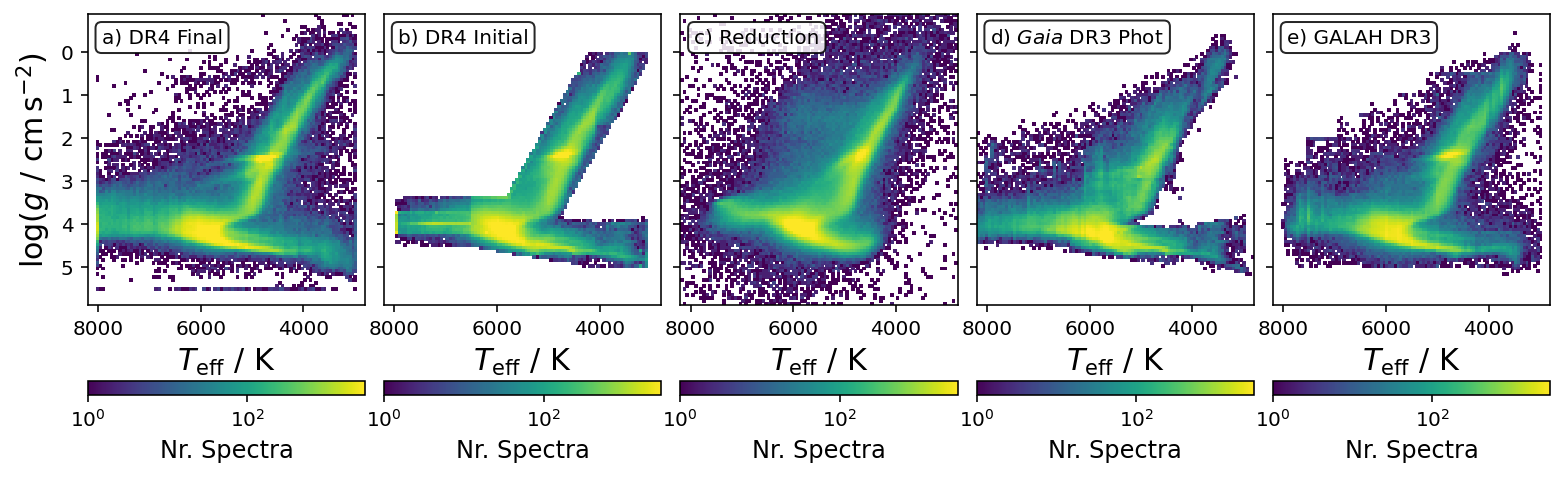

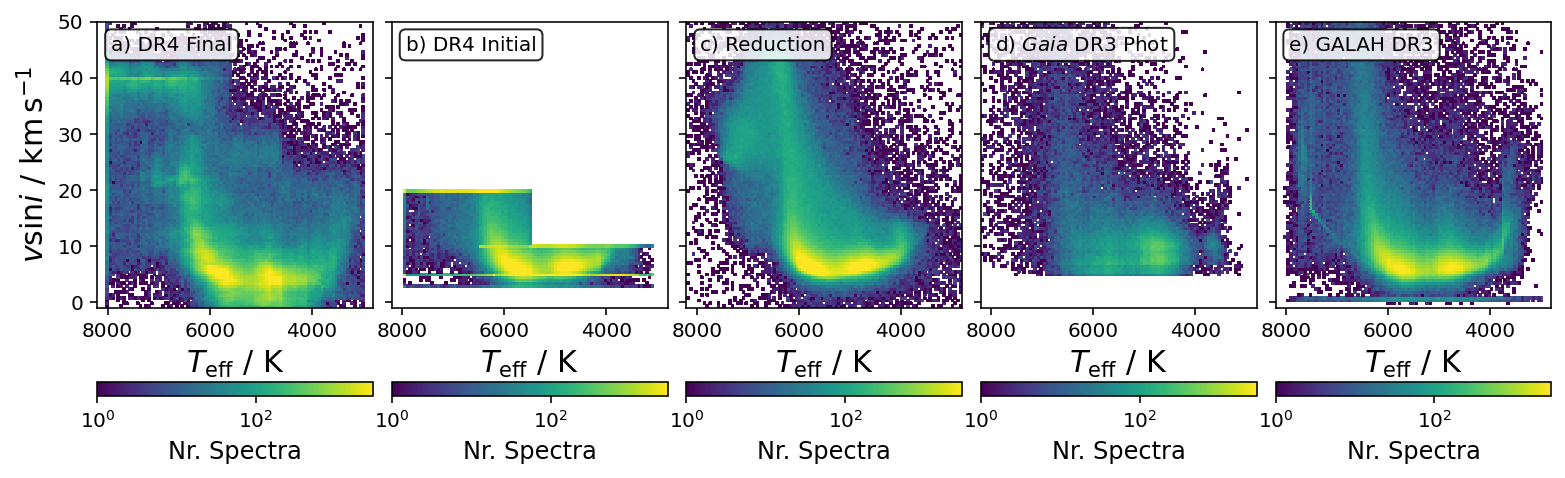

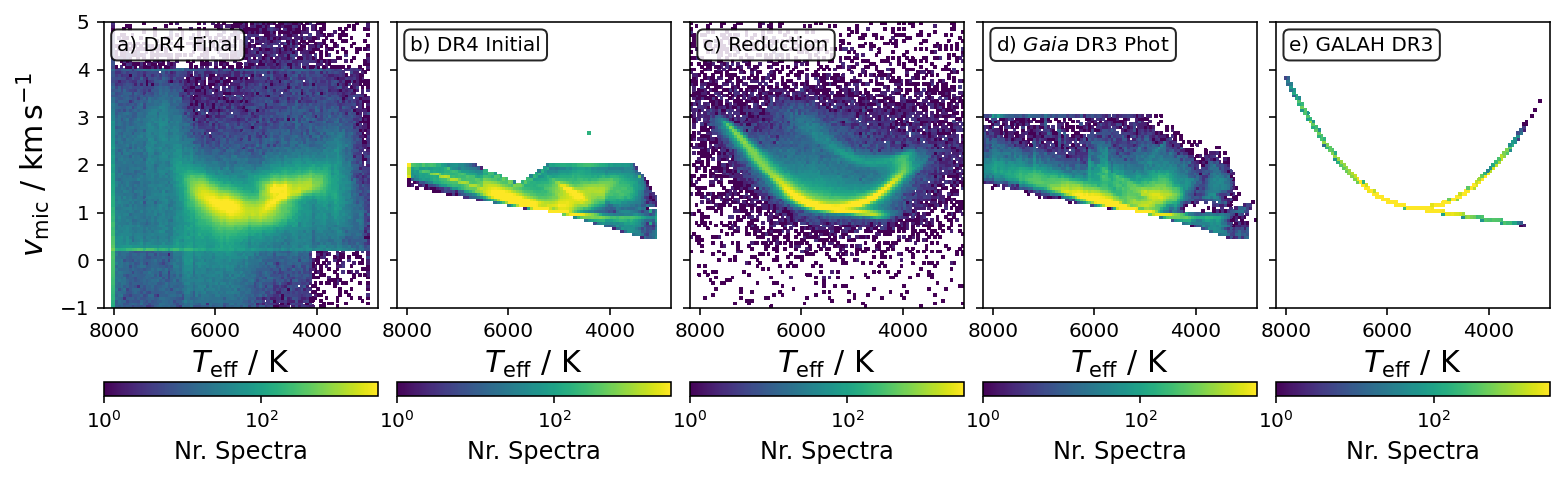

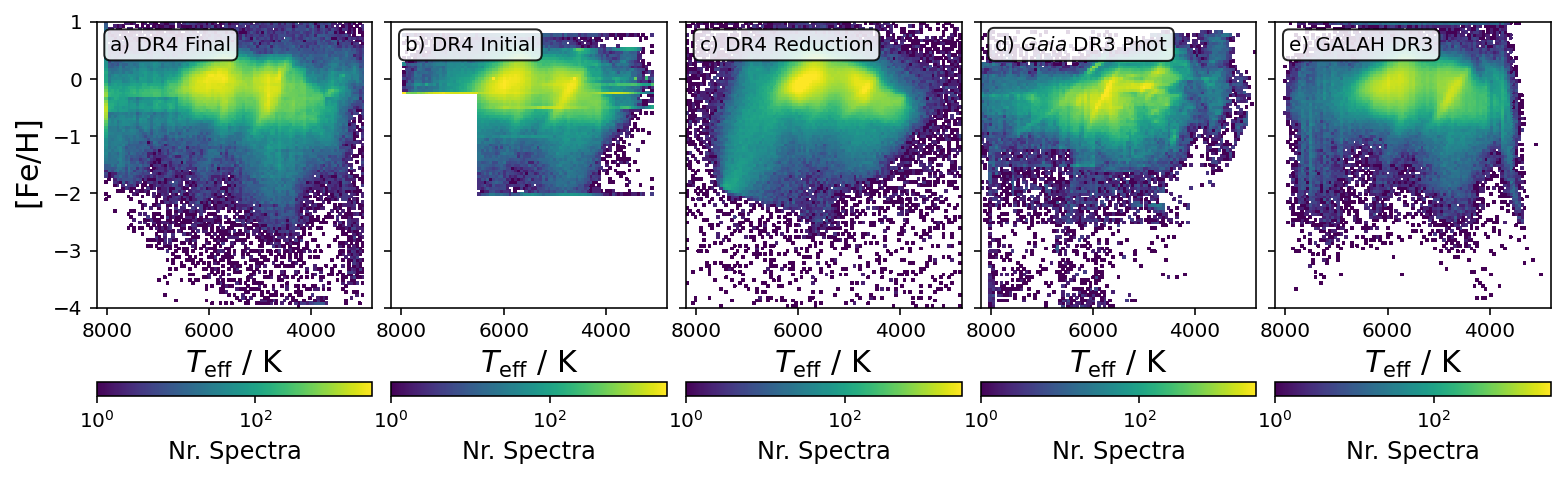

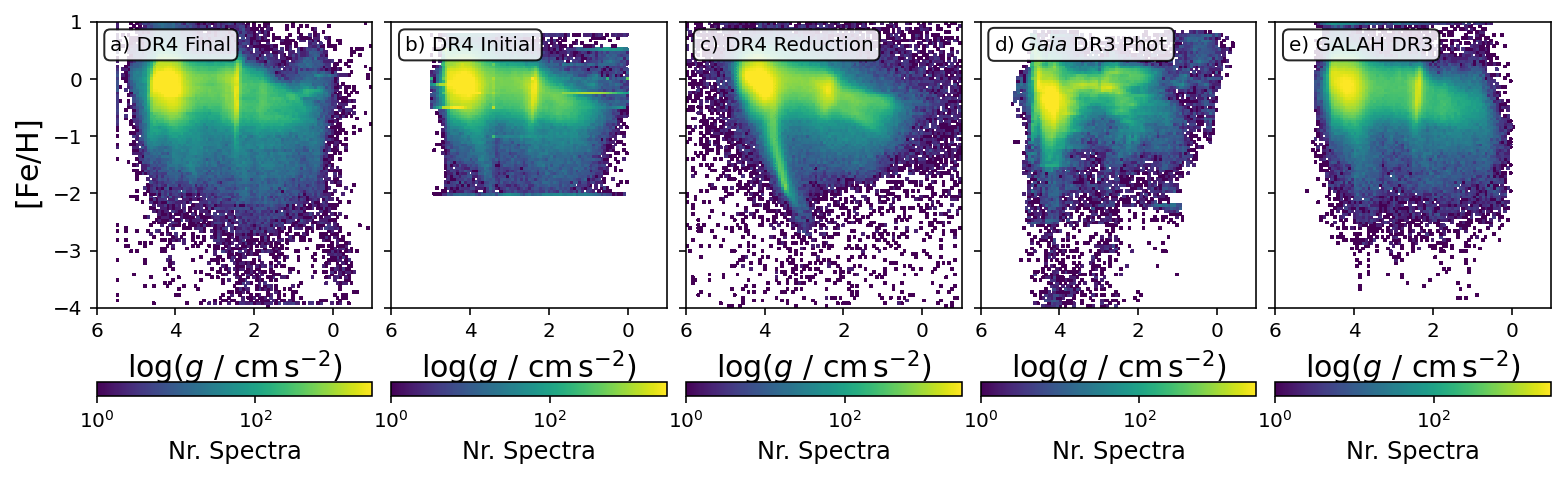

In [84]:
selection = (
    np.isfinite(initial_parameters['fe_h'])
)
print('All',len(initial_parameters['logg'][selection]))
print('Have Gaia',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_gaia'])]))
print('Have DR3',len(initial_parameters['logg'][selection & np.isfinite(initial_parameters['teff_dr3'])]))
print('Have Gaia or DR3',len(initial_parameters['logg'][selection & (np.isfinite(initial_parameters['teff_gaia']) | np.isfinite(initial_parameters['teff_dr3']))]))
print('Have neither Gaia nor DR3',len(initial_parameters['logg'][selection & (np.isnan(initial_parameters['teff_gaia']) & np.isnan(initial_parameters['teff_dr3']))]))
# compare_cmd(selection)
compare_teff_logg_red_gaia_dr3(selection,save=True)
compare_teff_vsini_red_gaia_dr3(selection,save=True)
compare_teff_vmic_red_gaia_dr3(selection,save=True)
compare_teff_fe_h_red_gaia_dr3(selection,save=True)
compare_logg_fe_h_red_gaia_dr3(selection,save=True)
# initial_parameters[selection]

In [118]:
np.all([np.isfinite(initial_parameters_lite[param]) for param in ['vrad','teff','logg','fe_h','vmic','vsini']])

True

# Post-correction of initial values

In [3]:
initial_parameters = Table.read('galah_dr4_initial_parameters_'+str(reduction_download_date)+'.fits')
initial_parameters_lite = Table.read('galah_dr4_initial_parameters_'+str(reduction_download_date)+'_lite.fits')

In [20]:
# stars with wrong initial parameters for cool dwarfs


wrong_init_cool_dwarfs = np.loadtxt('batches/wrong_init_cool_dwarfs',dtype=int)
for sobject_id in wrong_init_cool_dwarfs:
    
    full_index = np.where(initial_parameters['sobject_id'] == sobject_id)[0]
    lite_index = np.where(initial_parameters_lite['sobject_id'] == sobject_id)[0]
    
    if len(full_index) == 1:
        initial_parameters['teff'][full_index] = 3200.
        initial_parameters['teff_source'][full_index] = 8
        initial_parameters['logg'][full_index] = 4.65
        initial_parameters['logg_source'][full_index] = 8
        initial_parameters['fe_h'][full_index] = 0.00
        initial_parameters['fe_h_source'][full_index] = 8
        initial_parameters['vmic'][full_index] = 0.8040325 # from vmic_adjusted
        initial_parameters['vmic_source'][full_index] = 8
        initial_parameters['vsini'][full_index] = 5.0
        initial_parameters['vsini_source'][full_index] = 8

    if len(lite_index) == 1:
        initial_parameters_lite['teff'][lite_index] = 3200.
        initial_parameters_lite['logg'][lite_index] = 4.65
        initial_parameters_lite['fe_h'][lite_index] = 0.00
        initial_parameters_lite['vmic'][lite_index] = 0.8040325 # from vmic_adjusted
        initial_parameters_lite['vsini'][lite_index] = 5.0
        
initial_parameters.write('galah_dr4_initial_parameters_'+str(reduction_download_date)+'.fits',overwrite=True)
initial_parameters_lite.write('galah_dr4_initial_parameters_'+str(reduction_download_date)+'_lite.fits',overwrite=True)

In [21]:
wrong_init_giants1 = np.loadtxt('batches/wrong_init_giants1',dtype=int)
for sobject_id in wrong_init_giants1:
    
    full_index = np.where(initial_parameters['sobject_id'] == sobject_id)[0]
    lite_index = np.where(initial_parameters_lite['sobject_id'] == sobject_id)[0]
    
    if len(full_index) == 1:
        initial_parameters['teff'][full_index] = 4400.
        initial_parameters['teff_source'][full_index] = 8
        initial_parameters['logg'][full_index] = 0.5
        initial_parameters['logg_source'][full_index] = 8
        initial_parameters['fe_h'][full_index] = 0.00
        initial_parameters['fe_h_source'][full_index] = 8
        initial_parameters['vmic'][full_index] = 2.65605 # from vmic_adjusted
        initial_parameters['vmic_source'][full_index] = 8
        initial_parameters['vsini'][full_index] = 5.0
        initial_parameters['vsini_source'][full_index] = 8
        
    if len(lite_index) == 1:
        initial_parameters_lite['teff'][lite_index] = 4400.
        initial_parameters_lite['logg'][lite_index] = 0.5
        initial_parameters_lite['fe_h'][lite_index] = 0.00
        initial_parameters_lite['vmic'][lite_index] = 2.65605 # from vmic_adjusted
        initial_parameters_lite['vsini'][lite_index] = 5.0
        
initial_parameters.write('galah_dr4_initial_parameters_'+str(reduction_download_date)+'.fits',overwrite=True)
initial_parameters_lite.write('galah_dr4_initial_parameters_'+str(reduction_download_date)+'_lite.fits',overwrite=True)

In [7]:
full_index = np.where(initial_parameters['sobject_id'] == 150829005701170)[0]
lite_index = np.where(initial_parameters_lite['sobject_id'] == 150829005701170)[0]

initial_parameters['teff'][full_index][0] = 3500.
initial_parameters_lite['teff'][lite_index][0] = 3500.
initial_parameters['logg'][full_index][0] = 4.5
initial_parameters_lite['logg'][lite_index][0] = 4.5
initial_parameters['fe_h'][full_index][0] = 0.0
initial_parameters_lite['fe_h'][lite_index][0] = 0.0

initial_parameters.write('galah_dr4_initial_parameters_'+str(reduction_download_date)+'.fits',overwrite=True)
initial_parameters_lite.write('galah_dr4_initial_parameters_'+str(reduction_download_date)+'_lite.fits',overwrite=True)

full_index = np.where(initial_parameters['sobject_id'] == 140113002901180)[0]
lite_index = np.where(initial_parameters_lite['sobject_id'] == 140113002901180)[0]

initial_parameters['teff'][full_index][0] = 5000.
initial_parameters_lite['teff'][lite_index][0] = 5000.
initial_parameters['logg'][full_index][0] = 3.0
initial_parameters_lite['logg'][lite_index][0] = 3.0
initial_parameters['fe_h'][full_index][0] = -0.54
initial_parameters_lite['fe_h'][lite_index][0] = -0.54
initial_parameters['vmic'][full_index][0] = 0.8
initial_parameters_lite['vmic'][lite_index][0] = 0.8
initial_parameters['vsini'][full_index][0] = 5.4
initial_parameters_lite['vsini'][lite_index][0] = 5.4
initial_parameters['vrad'][full_index][0] = -19.0
initial_parameters_lite['vrad'][lite_index][0] = -19.0


initial_parameters.write('galah_dr4_initial_parameters_'+str(reduction_download_date)+'.fits',overwrite=True)
initial_parameters_lite.write('galah_dr4_initial_parameters_'+str(reduction_download_date)+'_lite.fits',overwrite=True)

In [22]:
# vmic_adjusted(np.array([3200.]),np.array([4.65]))

# CREATE BATCH FILES

In [11]:
has_plx = Table.read('../auxiliary_information/dr60_230101_ebv_wise_tmass_gaiadr3corr_xmatch.fits')
has_plx = has_plx[['sobject_id','parallax','r_med_geo','r_med_photogeo']]
has_plx = has_plx[np.isfinite(has_plx['parallax']) | np.isfinite(has_plx['r_med_geo'])]

In [36]:
unique_ids = Table.read('../observations/dr6.0_'+str(reduction_download_date)+'_unique_ids.fits')

data = join(unique_ids,has_plx,keys='sobject_id')
data.sort('tmass_id')

for year in np.arange(13,24,1):
    year = str(year)
    for month in np.arange(1,13):
        if month < 10:
            month = '0'+str(month)
        else:
            month = str(month)
        
        for day in np.arange(1,32):
            if day < 10:
                day = '0'+str(day)
            else:
                day = str(day)

            sobject_id_in_day = (
                (data['sobject_id'] > int(year) * 10000000000000 + int(month) * 100000000000 + int(day) * 1000000000) & 
                (data['sobject_id'] < int(year) * 10000000000000 + int(month) * 100000000000 + (int(day)+1) * 1000000000)
            )
            
            if len(data['sobject_id'][sobject_id_in_day]) > 0:
            
                print(year+month+day,len(data['sobject_id'][sobject_id_in_day]))
                np.savetxt('../spectrum_analysis/batches/'+year+month+day+'_tmass',list(data['tmass_id'][sobject_id_in_day]),fmt='%s')

        sobject_id_in_month = (
            (data['sobject_id'] > int(year) * 10000000000000 + int(month) * 100000000000) & 
            (data['sobject_id'] < int(year) * 10000000000000 + (int(month)+1) * 100000000000)
        )
        
        if len(data['sobject_id'][sobject_id_in_month]) > 0:
            print('======')
            
            print(year+month+'  ',len(data['sobject_id'][sobject_id_in_month]))
            
            np.savetxt('../spectrum_analysis/batches/'+year+month+'_tmass',list(data['tmass_id'][sobject_id_in_month]),fmt='%s')
            
            print('------')

131216 941
131217 1308
131220 157
1312   2406
------
140111 361
140112 366
140113 267
140114 731
140115 363
140116 477
140117 1095
140118 1086
1401   4746
------
140207 364
140208 2
140209 976
1402   1342
------
140303 172
140304 340
140305 642
140307 713
140308 892
140309 942
140310 1017
140312 2047
140313 1068
140314 1329
140315 338
140316 2033
1403   11533
------
140409 1748
140412 2103
140413 2796
140414 2448
1404   9095
------
140607 1069
140608 2108
140609 2501
140610 1352
140611 2501
1406   9531
------
140707 2830
140708 2116
140709 1072
140710 1054
140711 2850
140713 1962
1407   11884
------
140805 2849
140806 2494
140807 2145
140808 2745
140809 2499
140810 2743
140811 2500
140812 2147
140813 1746
140814 2500
140822 50
140823 386
140824 223
1408   25027
------
141031 357
1410   357
------
141102 1075
141103 1426
141104 2456
1411   4957
------
141202 360
141231 1786
1412   2146
------
150101 1420
150102 1378
150103 2145
150105 714
150106 1785
150107 2121
150108 1410
150109 354
1